# **Predicción temprana de progresión a riesgo cardiovascular para priorización preventiva en APS rural.**

Claudio Cárdenas Mansilla$^{1}$ \\
Evelyn Sánchez Cabezas$^{2}$ \\

$^{1}$ Subdepartamento de Inteligencia Sanitaria, Dirección de Servicio de Salud Chiloé \\
$^{2}$ Coordinación de Centros de Atención a la Comunidad, Facultad de Salud y Ciencias Sociales, Universidad de Las Américas \\

## Resumen Ejecutivo.
Se desarrolló un modelo predictivo para estimar el riesgo de progresión hacia criterios del Programa de Salud Cardiovascular (PSCV) en personas atendidas en la Atención Primaria de Salud (APS) de Quellón, integrando 3.058 registros del Control Cardiovascular y del Examen de Medicina Preventiva del Adulto (EMPA) recopilados entre 2021 y 2023. Tras un preprocesamiento estandarizado de los datos y validación cruzada, el modelo XGBoost optimizado obtuvo el mejor desempeño global con una área bajo la curva precisión-recall (PR-AUC) de aproximadamente 0,895, junto con una precisión del 82% y sensibilidad del 76% en la detección de usuarios que progresan a PSCV (clase positiva).

El índice de Youden calculado sobre la curva ROC definió un umbral operativo cercano a 0,52 en la probabilidad predicha, recomendado para clasificar a los usuarios de alto riesgo y orientar intervenciones preventivas. Este enfoque permite identificar tempranamente a personas con mayor probabilidad de progresar a PSCV, optimizar la priorización de sus controles en APS, fortalecer la gestión del riesgo cardiovascular y apoyar la planificación de la carga asistencial del programa cardiovascular a nivel comunal.

## Objetivo del estudio.

El objetivo de este estudio fue desarrollar un modelo predictivo de progresión hacia criterios PSCV en usuarios que actualmente no cumplen los umbrales establecidos, utilizando registros rutinarios de la comuna de Quellón. Se integraron bases del Control Cardiovascular y del Examen de Medicina Preventiva (EMPA), obteniendo un conjunto de 3.058 usuarios con variables clínicas básicas. Tras un flujo de procesamiento que incluyó limpieza, imputación, estandarización y creación de variables dummy, se entrenaron modelos de regresión logística, Modelo KNN (K-Nearest Neighbors o Vecinos más Cercanos), Modelo SVM (Máquina de Vectores de Soporte) y Modelo XGBoost (Extreme Gradient Boosting).


## Justificación de abordaje del  problema mediante *algoritmos de Machine Learning*.


Desde un punto de vista computacional, el problema de predecir la progresión hacia criterios del Programa de Salud Cardiovascular (PSCV) en usuarios que aún no cumplen los umbrales clínicos establecidos constituye un desafío relevante y no abordable de forma eficiente mediante enfoques tradicionales de programación basada en reglas. Las principales razones son las siguientes:

- ***Relaciones no lineales y multifactoriales*** :
La progresión al PSCV no responde a reglas lineales simples del tipo “si-entonces”. Variables como edad, presión arterial, circunferencia de cintura y colesterol interactúan entre sí de manera compleja y no lineal. Por ejemplo, un mismo nivel de presión arterial puede tener implicancias de riesgo distintas según la edad o el perfil antropométrico del usuario. Este tipo de interacciones es difícil de codificar explícitamente mediante lógica determinista tradicional.


Fuente: https://openaccess.uoc.edu/server/api/core/bitstreams/a5dca908-d32d-4e4c-a677-b143eba20d0d/content


- ***Ruido, variabilidad biológica y heterogeneidad poblacional*** :
Los datos provienen de registros rutinarios de APS, con variabilidad inherente a la medición clínica, diferencias entre profesionales, condiciones de toma de exámenes y heterogeneidad epidemiológica de la población. Esta variabilidad introduce ruido que dificulta establecer umbrales fijos o reglas universales estables, como exigiría un enfoque programático clásico.

Fuente: https://www.researchgate.net/publication/393849207_Overcoming_Data_Quality_Challenges_in_Healthcare_Predictive_Models

- ***Incertidumbre y naturaleza probabilística del fenómeno*** :
La progresión hacia criterios PSCV no es un evento determinístico, sino probabilístico. Dos personas con perfiles clínicos similares pueden evolucionar de manera distinta en el tiempo. Los enfoques tradicionales no manejan adecuadamente esta incertidumbre, mientras que los modelos predictivos permiten estimar probabilidades continuas y niveles de riesgo.

Fuente: https://arxiv.org/abs/2008.10114

- ***Sesgo-Varianza y riesgo de sobreajuste con métodos simples***: En el aprendizaje estadístico existe el llamado dilema sesgo-varianza, donde modelos demasiado simples (alta bias) no capturan patrones relevantes, y modelos muy complejos se ajustan a ruido en los datos (overfitting). Los enfoques tradicionales de programación no cuentan con mecanismos sistemáticos para balancear este dilema, mientras que los modelos predictivos supervisados (p. ej., árboles de decisión, XGBoost) incluyen regularización y validación cruzada para evitar sobreajuste y mejorar generalización.

Fuente: https://es.wikipedia.org/wiki/Dilema_sesgo-varianza


- ***Necesidad de generalización y adaptación poblacional***: Los modelos clínicos deben generalizar a diferentes contextos poblacionales (edad, género, características epidemiológicas locales). Los enfoques tradicionales como reglas condicionales escritas a mano pierden eficacia cuando se aplican fuera del contexto original de diseño, mientras que los sistemas de aprendizaje automático pueden aprender patrones implícitos adaptados a características específicas de la población estudiada, como la comuna de Quellón..

Fuente: https://www.nature.com/articles/s41598-025-26855-8


A modo de conclusión, el desafío computacional radica en que la progresión al PSCV es un fenómeno complejo, no lineal, ruidoso y probabilístico, que emerge de la interacción de múltiples variables clínicas. Estas características hacen inviable su resolución mediante programación basada en reglas fijas y justifican el uso de modelos predictivos supervisados, capaces de aprender patrones latentes desde los datos y adaptarse a la realidad operativa de la Atención Primaria de Salud.

## Materiales y Métodos.

### Fuentes de datos.
Se utilizaron dos fuentes de información provenientes de la Atención Primaria de Salud (APS) de la comuna de Quellón. La primera corresponde a la base de datos de la población en control cardiovascular, con corte a junio de 2017, la cual incluye un total de 1.478 registros clínicos. La segunda fuente corresponde a la base de datos del Examen de Medicina Preventiva (EMP), correspondiente al año 2016 y al primer semestre de 2017, extraída desde el sistema RAYEN y proporcionada por el Subdepartamento de Tecnologías de la Información del Servicio de Salud Chiloé, con un total de 1.580 registros.

El proceso de integración y depuración de ambas fuentes permitió consolidar un total de 3.058 registros válidos para el análisis. Posteriormente, y de acuerdo con las etapas de comprensión y preparación de los datos definidas en la metodología CRISP-DM, se construyó una matriz analítica depurada, compuesta por nueve variables predictoras de carácter clínico y demográfico: edad, circunferencia de cintura (CC), presión arterial sistólica (PAS), presión arterial diastólica (PAD), colesterol total, peso, talla y sexo.

Los datos utilizados en el presente estudio corresponden a una submuestra de los registros empleados en el estudio previamente publicado por Cárdenas et al. (2018), el cual consideró un total de 3.586 registros: Diseño de un modelo predictivo de pesquisa cardiovascular utilizando Árboles de Decisión: propensión de pacientes a presentar diabetes tipo 2, hipertensión arterial o dislipidemia: estudio piloto, comuna de Quellón, Chiloé (Revista Chilena de Cardiología, 37(2), 126–133; https://dx.doi.org/10.4067/S0718-85602018000200126
). En este trabajo, los datos son reutilizados como análisis secundario, con el objetivo de aplicar nuevos algoritmos de aprendizaje automático, junto con estrategias de validación y testeo más robustas, acordes a los avances metodológicos y tecnológicos actuales, con el fin de fortalecer la capacidad predictiva y la solidez de los resultados obtenidos.


### Consideraciones éticas

El estudio se desarrolló a partir de datos secundarios provenientes de registros clínicos rutinarios de la Atención Primaria de Salud, debidamente anonimizados y sin información que permita la identificación directa o indirecta de las personas. El uso de la información se enmarca en fines de investigación en salud pública y mejora de la gestión sanitaria, respetando los principios éticos de confidencialidad, minimización de datos y uso responsable de la información, de acuerdo con la normativa vigente y las buenas prácticas en investigación epidemiológica.

Asimismo, la reutilización de los datos se realizó con plena transparencia, declarando explícitamente su uso previo en una publicación científica y estableciendo que el presente trabajo corresponde a un análisis secundario con objetivos y enfoques metodológicos distintos, lo cual es consistente con las recomendaciones del Comité Internacional de Editores de Revistas Médicas (ICMJE) y del Committee on Publication Ethics (COPE).

Fuente: https://www.icmje.org/recommendations/browse/publishing-and-editorial-issues/overlapping-publications.html


### Variable Objetivo

Esta variable se definió con la denominación “PCV”, compuesta por dos grupos: GRUPO 1 = Grupo de pacientes en control del Programa Cardiovascular, que presenta al menos una de las tres patologías (DM, HTA o DLP). GRUPO 0 = Grupo de Pacientes EMPA (2016 a junio 2017) y que no están en control en Programa Cardiovascular, al corte de junio del 2017 y, eventualmente, no presenta ninguna de las tres patologías señaladas. Luego, este grupo servirá para poder discriminar y encontrar aquellos patrones en los datos que caracterizan a las personas con algunas de las tres patologías del grupo “1” y las diferencian de aquellos en el grupo “0”.


In [1]:
# @title
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# @title
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score
)

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
np.random.seed(42)

## Dataset y descripción de variables

In [3]:
# @title
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ACTIVIDAD 2 MACHINE LEARNING II/PROYECTO FINAL ML II MDS/data_model_pvc_quellon_2024_fin.xlsx')
df.columns

Index(['PCV', 'SEXO', 'EDAD', 'PESO', 'TALLA', 'CC', 'PAS', 'PAD', 'CT'], dtype='object')

### Diccionario de Caracteristicas:

- PCV: Variable Objetivo progresión hacia criterios PSCV (Programa de Salud Cardiovascular), cumplimiento (0 = No Cumple; 1 = Si Cumple)
- SEXO: Sexo del Usuario (0 = Hombre; 1 = Mujer)
- EDAD: Edad del usuario en años.
- PESO: Peso del Usuario en Kilogramos.
- TALLA: Talla (estatura) en centimetros.
- CC: Cirscunferencia de Cintura en metros.
- PAS: Presión arterial sistolica (Normal: Presión sistólica menor de \(120\) mmHg.)
- PAD: Presión arterial diastolica (Normal: Presión diastólica menor de \(80\) mmHg.)
- CT: Colesterol Total (Los valores normales de colesterol total para adultos son menos de 200 mg/dL (miligramos por decilitro))

##Exploración y preprocesamiento de datos

### Exploración inicial del dataset.

In [4]:
df.head()

,PCV,SEXO,EDAD,PESO,TALLA,CC,PAS,PAD,CT
0,1,0,56,110.2,168,119.0,126,80,275.0
1,1,1,81,70.0,144,97.0,130,60,171.0
2,1,1,60,92.4,155,110.0,180,86,216.0
3,1,1,84,70.2,152,113.0,116,70,198.0
4,1,0,76,77.1,150,107.0,180,80,223.0


### Tamaño del dataset y variable Objetivo "PCV".

Tamaño del dataset: (3058, 9)
PCV
0    0.516678
1    0.483322
Name: proporción, dtype: float64


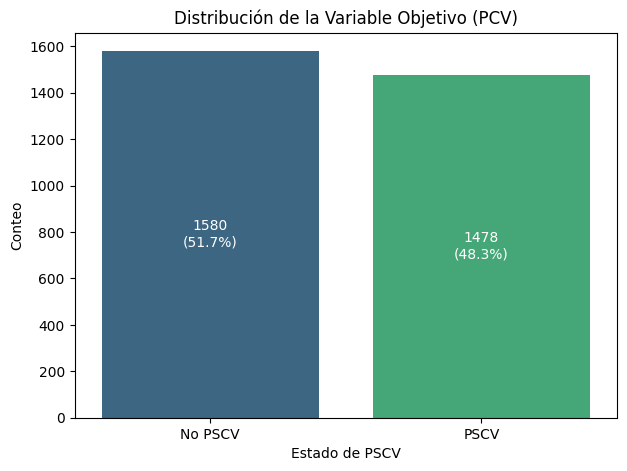

In [5]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

print("Tamaño del dataset:", df.shape)

print(df["PCV"].value_counts(normalize=True).rename("proporción"))

# Crear el gráfico de barras para 'PCV'
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='PCV', data=df, palette='viridis')
plt.title('Distribución de la Variable Objetivo (PCV)')
plt.xlabel('Estado de PSCV')
plt.ylabel('Conteo')

# Ajustar las etiquetas del eje X
ax.set_xticks([0, 1])
ax.set_xticklabels(['No PSCV', 'PSCV'])

# Calcular conteos y proporciones
total = len(df['PCV'])
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total)
    ax.text(p.get_x() + p.get_width() / 2.,
            height / 2, # Position label inside the bar (half height)
            f'{int(height)}\n({percentage})',
            ha='center', va='center', fontsize=10, color='white') # Center vertically and use white color

plt.show()

### Definición de variables cuantitativas, categóricas y variable Objetivo.

In [6]:
# @title
numeric_features = [
    "EDAD",
    "PESO",
    "TALLA", "CC", "PAS", "PAD", "CT"
]

categorical_features = [
    "SEXO",
]

X = df[numeric_features + categorical_features]
y = df["PCV"]

### Descripción de variable explicativas en función de variable objetivo.

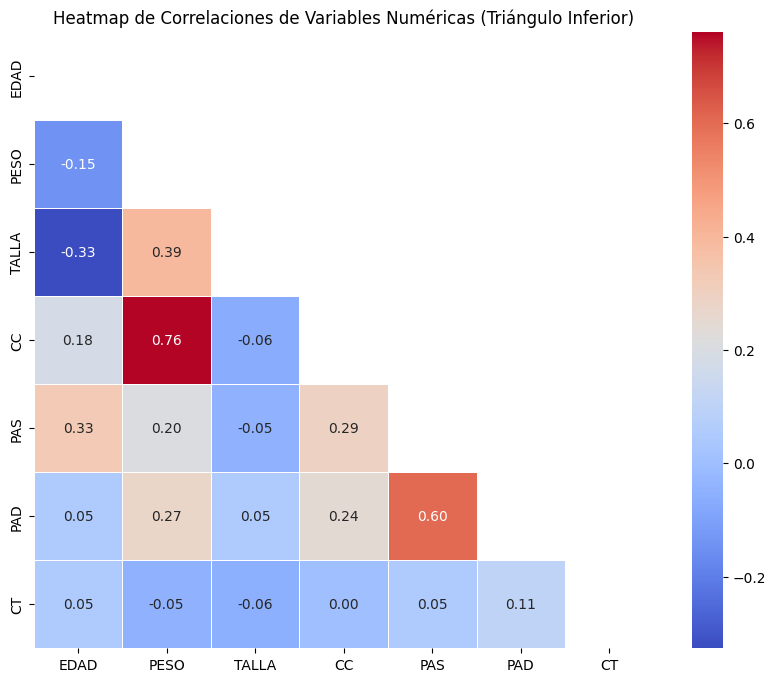

In [7]:
# @title
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = df[numeric_features].corr()

# Crear una máscara para la parte superior del triángulo
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crear el Heatmap de Correlaciones con la máscara aplicada
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Heatmap de Correlaciones de Variables Numéricas (Triángulo Inferior)')
plt.show()

### Identificación de valores faltantes.




In [8]:
# @title
missing_data = []

for col in df.columns:
    # Conteo de valores nulos
    null_count = df[col].isnull().sum()

    # Conteo de valores en blanco (solo para tipos de datos de cadena)
    blank_count = 0
    if df[col].dtype == 'object' or pd.api.types.is_string_dtype(df[col]):
        blank_count = (df[col] == '').sum()

    total_missing = null_count + blank_count
    total_rows = len(df)
    percentage_missing = (total_missing / total_rows) * 100

    missing_data.append({
        'Variable': col,
        'Nulos': null_count,
        'Blancos': blank_count,
        'Total Faltantes': total_missing,
        '% Faltantes': f'{percentage_missing:.2f}%'
    })

missing_df = pd.DataFrame(missing_data)
print(missing_df)

  Variable  Nulos  Blancos  Total Faltantes % Faltantes
0      PCV      0        0                0       0.00%
1     SEXO      0        0                0       0.00%
2     EDAD      0        0                0       0.00%
3     PESO      0        0                0       0.00%
4    TALLA      0        0                0       0.00%
5       CC      0        0                0       0.00%
6      PAS      0        0                0       0.00%
7      PAD      0        0                0       0.00%
8       CT      0        0                0       0.00%


### Distribución de variable categórica (sexo).

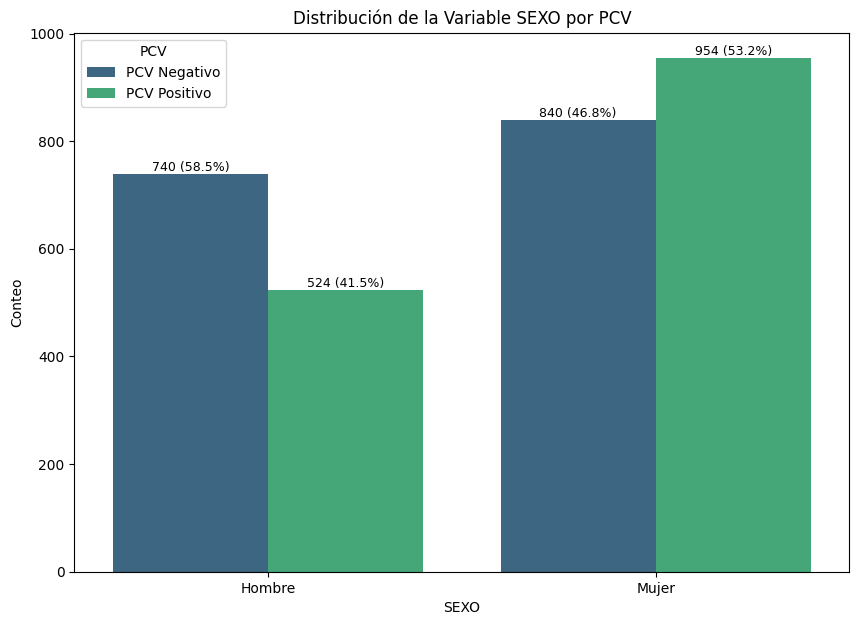

Conteo de SEXO:
SEXO_LABEL
Hombre    1264
Mujer     1794
Name: count, dtype: int64

Proporción de SEXO:
SEXO_LABEL
Hombre    0.413342
Mujer     0.586658
Name: proportion, dtype: float64


In [9]:
# @title
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Mapear los valores numéricos a etiquetas descriptivas para SEXO
df['SEXO_LABEL'] = df['SEXO'].map({0: 'Hombre', 1: 'Mujer'})

# Mapear los valores numéricos a etiquetas descriptivas para PCV
df['PCV_LABEL'] = df['PCV'].map({0: 'PCV Negativo', 1: 'PCV Positivo'})

# Definir el orden deseado para las categorías en el gráfico
category_order_sexo = ['Hombre', 'Mujer']
category_order_pcv = ['PCV Negativo', 'PCV Positivo']

# Crear el gráfico de barras, especificando el orden y usando hue para PCV
plt.figure(figsize=(10, 7))
ax = sns.countplot(x='SEXO_LABEL', data=df, palette='viridis', order=category_order_sexo, hue='PCV_LABEL', hue_order=category_order_pcv)
plt.title('Distribución de la Variable SEXO por PCV')
plt.xlabel('SEXO')
plt.ylabel('Conteo')
plt.legend(title='PCV')

# Calcular conteos y proporciones para las etiquetas
# Usamos pd.crosstab para obtener los conteos de forma sencilla
counts_table = pd.crosstab(df['SEXO_LABEL'], df['PCV_LABEL'])
# Y para las proporciones dentro de cada grupo SEXO
proportions_table = pd.crosstab(df['SEXO_LABEL'], df['PCV_LABEL'], normalize='index')

# Añadir conteo y proporción a cada barra
for i, container in enumerate(ax.containers):
    pcv_label = category_order_pcv[i] # Obtener la etiqueta PCV para este contenedor

    for bar_idx, bar in enumerate(container):
        sexo_label = category_order_sexo[bar_idx] # Obtener la etiqueta SEXO para esta barra

        count = counts_table.loc[sexo_label, pcv_label]
        proportion = proportions_table.loc[sexo_label, pcv_label]

        # Colocar la etiqueta de texto
        ax.text(
            bar.get_x() + bar.get_width() / 2, # Posición X: centro de la barra
            bar.get_height(),                  # Posición Y: en la parte superior de la barra
            f'{count} ({proportion:.1%})',     # Texto: conteo (proporción)
            ha='center', va='bottom', fontsize=9, color='black'
        )

plt.show()


print("Conteo de SEXO:")
print(df['SEXO_LABEL'].value_counts().reindex(category_order_sexo))
print("\nProporción de SEXO:")
print(df['SEXO_LABEL'].value_counts(normalize=True).reindex(category_order_sexo))


### Análisis descriptivo de variables cuantitativas.

In [10]:
# @title
print('Descripción de Variables Cuantitativas:')
display(X[numeric_features].describe())

Descripción de Variables Cuantitativas:


,EDAD,PESO,TALLA,CC,PAS,PAD,CT
count,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000
mean,50.683453,76.633869,157.997057,100.423708,121.773054,74.954545,200.190320
std,15.133076,13.482398,8.728728,11.166665,16.367233,9.872042,35.354991
min,19.000000,40.000000,135.000000,65.000000,80.000000,48.000000,130.000000
25%,39.000000,67.000000,151.000000,93.000000,110.000000,70.000000,174.000000
50%,50.000000,75.000000,157.000000,100.000000,120.000000,78.000000,196.000000
75%,60.000000,85.000000,164.000000,107.000000,130.000000,80.000000,222.000000
max,94.000000,125.000000,192.000000,140.000000,190.000000,110.000000,343.000000


### Distribución de variables cuantitativas del dataset.

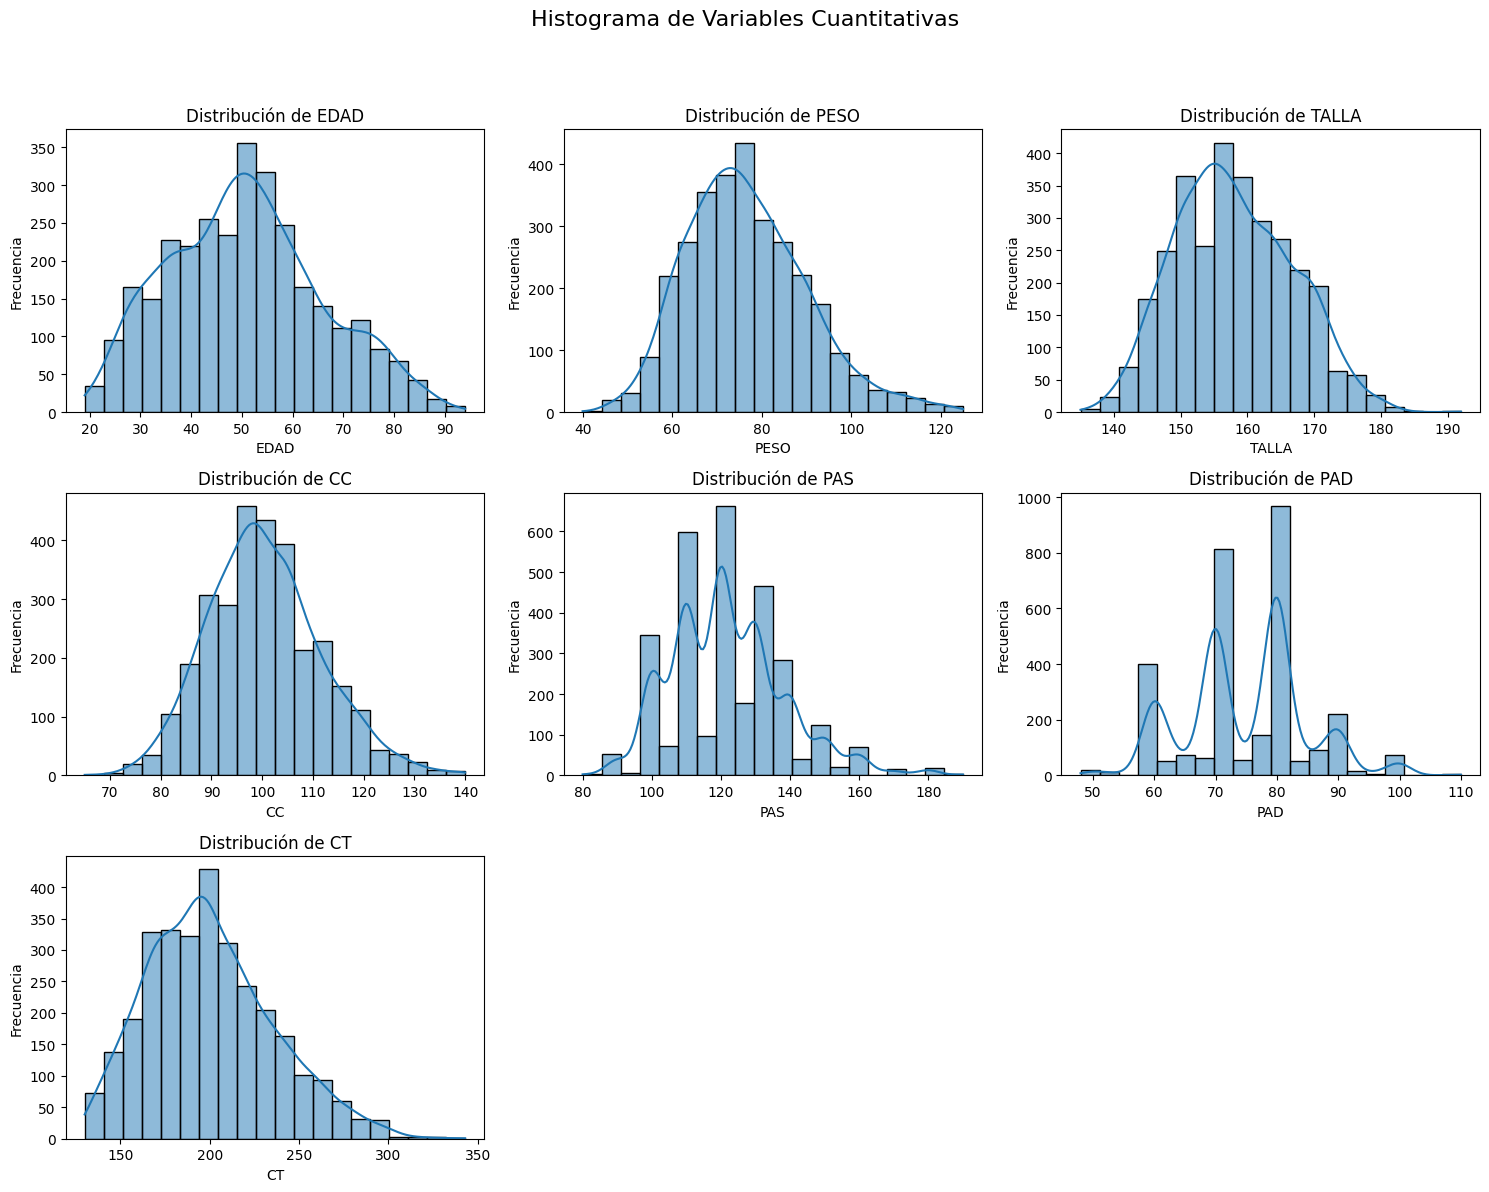

In [11]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Determina el número de filas y columnas para la matriz de gráficos
num_features = len(numeric_features)
num_cols = 3  # Puedes ajustar el número de columnas deseado
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 5, num_rows * 4))
plt.suptitle('Histograma de Variables Cuantitativas', y=1.02, fontsize=16)

for i, feature in enumerate(numeric_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[feature], kde=True, bins=20) # Removed palette argument as it was ignored without a 'hue' variable
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajusta el layout para evitar solapamientos
plt.show()

## Análisis de datos Atípicos (Outliers).

Dado que las variables clínicas cuantitativas pueden presentar valores extremos que distorsionen la estimación de parámetros y la estabilidad de los modelos, se aplicó un procedimiento sistemático de tratamiento de datos atípicos basado en el método del rango intercuartílico (IQR). Para cada variable numérica (edad, peso, talla, CC, PAS, PAD y CT) se calcularon los percentiles 25 (Q1) y 75 (Q3), obteniendo el IQR (Q3–Q1). Los valores inferiores a Q1 − 1,5·IQR fueron reemplazados por el límite inferior y los superiores a Q3 + 1,5·IQR fueron reemplazados por el límite superior. Se generó así una versión del dataset sin outliers (df_no_outliers), conservando en paralelo una copia del dataset original para referencia. A partir de esta versión depurada se definieron las matrices de entrada (X) y de salida (y) del modelo.

### Identificación de datos atípicos

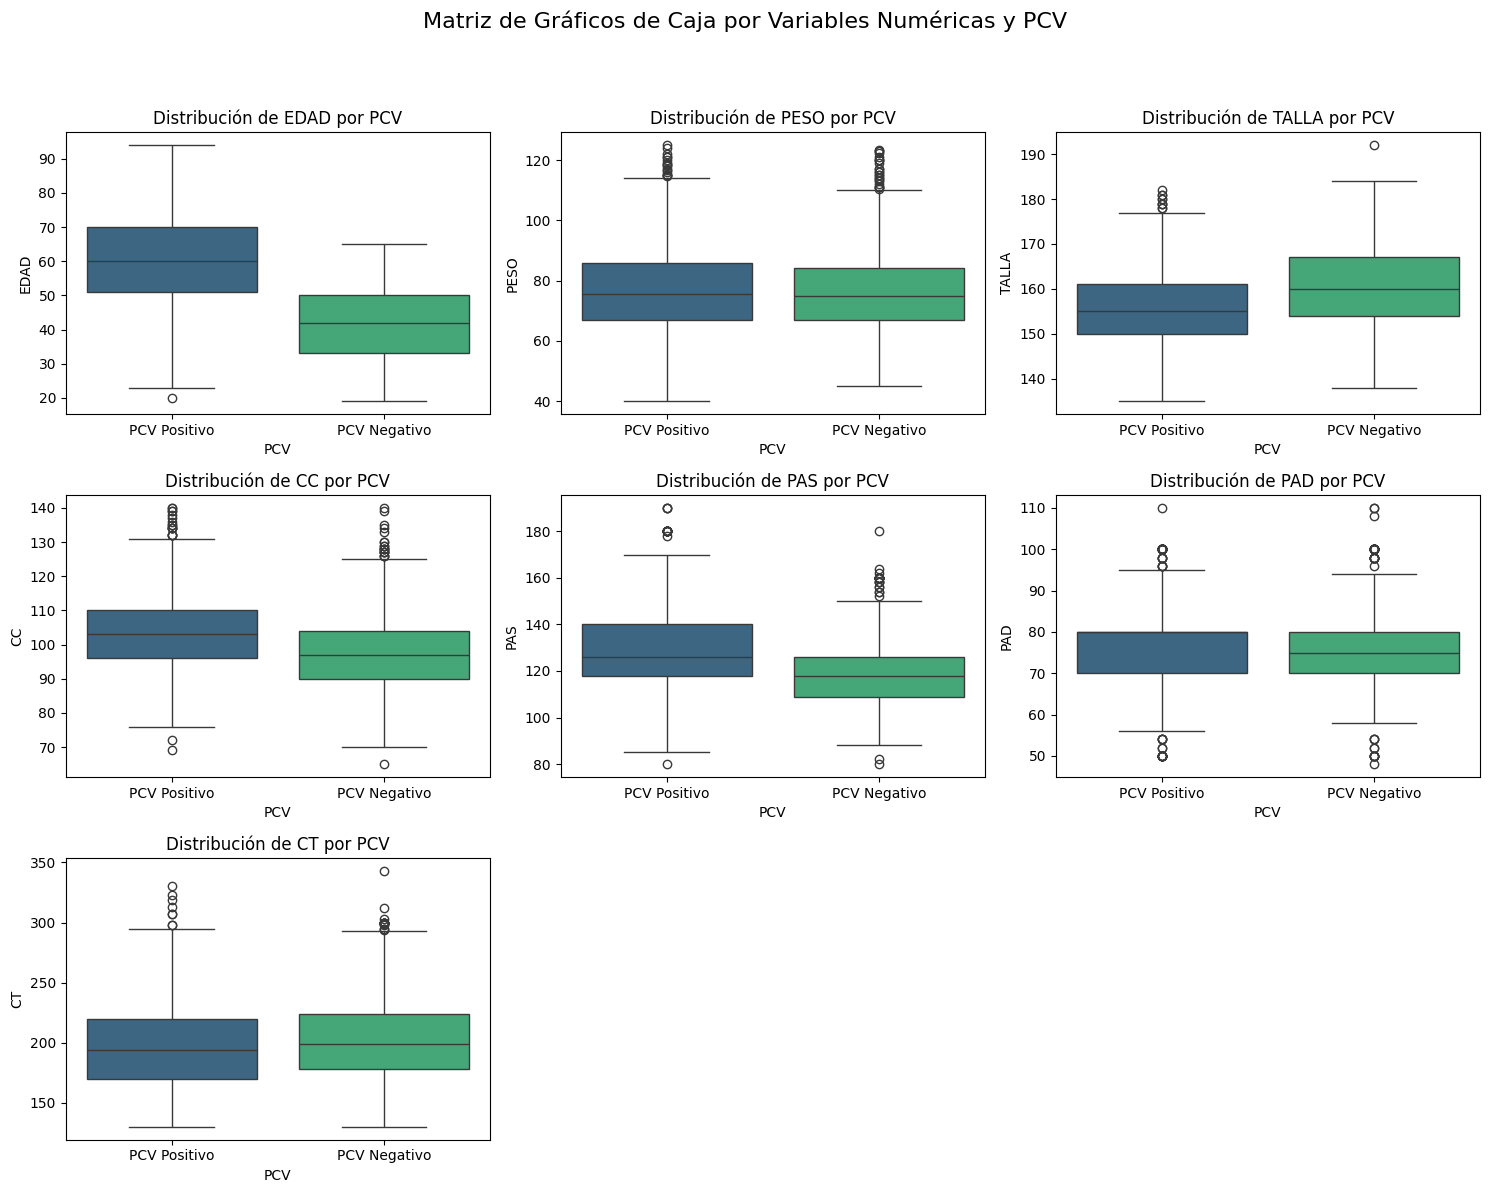

In [12]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Define las variables numéricas y la variable de agrupamiento
numeric_features = [
    "EDAD",
    "PESO",
    "TALLA", "CC", "PAS", "PAD", "CT"
]
pcv_variable_label = 'PCV_LABEL'

# Determina el número de filas y columnas para la matriz de gráficos
num_features = len(numeric_features)
num_cols = 3  # Puedes ajustar el número de columnas
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 5, num_rows * 4))
plt.suptitle('Matriz de Gráficos de Caja por Variables Numéricas y PCV', y=1.02, fontsize=16)

for i, feature in enumerate(numeric_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=pcv_variable_label, y=feature, data=df, palette='viridis')
    plt.title(f'Distribución de {feature} por PCV')
    plt.xlabel('PCV')
    plt.ylabel(feature)

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajusta el layout para evitar solapamientos
plt.show()


### Tratamiento de datos atípicos.



In [13]:
# @title
def handle_outliers_iqr(df_input, columns, iqr_multiplier=1.5):
    """
    Identifica y reemplaza outliers en un DataFrame usando el método IQR.
    Los outliers son reemplazados por el límite inferior o superior del IQR.

    Args:
        df_input (pd.DataFrame): El DataFrame de entrada.
        columns (list): Lista de nombres de columnas donde buscar outliers.
        iqr_multiplier (float): Multiplicador para el IQR (por defecto 1.5).

    Returns:
        pd.DataFrame: Un nuevo DataFrame con los outliers reemplazados.
    """
    df_processed = df_input.copy() # Crear una copia para no modificar el dataset original
    original_df_saved = df_input.copy() # Guardar el dataset inicial sin modificaciones

    for col in columns:
        if col in df_processed.columns and pd.api.types.is_numeric_dtype(df_processed[col]):
            Q1 = df_processed[col].quantile(0.25)
            Q3 = df_processed[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - iqr_multiplier * IQR
            upper_bound = Q3 + iqr_multiplier * IQR

            # Reemplazar outliers: valores menores que el límite inferior por el límite inferior
            df_processed.loc[df_processed[col] < lower_bound, col] = lower_bound
            # Reemplazar outliers: valores mayores que el límite superior por el límite superior
            df_processed.loc[df_processed[col] > upper_bound, col] = upper_bound
        else:
            print(f"Advertencia: La columna '{col}' no es numérica o no existe y será ignorada.")

    print("El dataset original se ha guardado en la variable 'original_df_saved'.")
    return df_processed, original_df_saved

# Ejemplo de uso:

df_no_outliers, original_df_saved = handle_outliers_iqr(df, numeric_features)
print("\nDataFrame sin outliers (primeras 5 filas):")
display(df_no_outliers.head())
print("\nDataFrame original (primeras 5 filas, sin modificar):")
display(original_df_saved.head())

El dataset original se ha guardado en la variable 'original_df_saved'.

DataFrame sin outliers (primeras 5 filas):


,PCV,SEXO,EDAD,PESO,TALLA,CC,PAS,PAD,CT,SEXO_LABEL,PCV_LABEL
0,1,0,56.0,110.2,168.0,119.0,126,80,275.0,Hombre,PCV Positivo
1,1,1,81.0,70.0,144.0,97.0,130,60,171.0,Mujer,PCV Positivo
2,1,1,60.0,92.4,155.0,110.0,160,86,216.0,Mujer,PCV Positivo
3,1,1,84.0,70.2,152.0,113.0,116,70,198.0,Mujer,PCV Positivo
4,1,0,76.0,77.1,150.0,107.0,160,80,223.0,Hombre,PCV Positivo



DataFrame original (primeras 5 filas, sin modificar):


,PCV,SEXO,EDAD,PESO,TALLA,CC,PAS,PAD,CT,SEXO_LABEL,PCV_LABEL
0,1,0,56,110.2,168,119.0,126,80,275.0,Hombre,PCV Positivo
1,1,1,81,70.0,144,97.0,130,60,171.0,Mujer,PCV Positivo
2,1,1,60,92.4,155,110.0,180,86,216.0,Mujer,PCV Positivo
3,1,1,84,70.2,152,113.0,116,70,198.0,Mujer,PCV Positivo
4,1,0,76,77.1,150,107.0,180,80,223.0,Hombre,PCV Positivo


In [14]:
# @title
# Definir X y Y usando el DataFrame sin outliers
X = df_no_outliers[numeric_features + categorical_features]
y = df_no_outliers["PCV"]

## Preprocesamiento de variables (Pipeline de escalado y codificación de variables)

Las variables explicativas se clasificaron en:

- Cuantitativas: edad, peso, talla, CC, PAS, PAD, CT.

- Categóricas: sexo (0 = hombre, 1 = mujer).

Para estandarizar el tratamiento de los datos se construyó un pipeline de preprocesamiento basado en ColumnTransformer:

- Las variables numéricas se transformaron mediante escalamiento estándar (StandardScaler), centrando en media 0 y desviación estándar 1.

La variable categórica sexo se codificó mediante One-Hot Encoding con eliminación de una categoría en el caso binario (drop="if_binary"), evitando colinealidad perfecta y permitiendo su integración en los modelos de regresión logística.

Adicionalmente, para una de las especificaciones de regresión logística se incorporaron términos polinomiales de segundo grado (incluyendo interacciones) sobre las variables numéricas mediante PolynomialFeatures(degree=2), seguidos de escalamiento estándar, con el objetivo de capturar relaciones no lineales manteniendo un marco paramétrico controlado.

In [15]:
# @title
numeric_features = [
    "EDAD",
    "PESO",
    "TALLA", "CC", "PAS", "PAD", "CT"
]

categorical_features = [
    "SEXO"
]

numeric_transformer_base = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse_output=False))
])

preprocessor_base = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_base, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


## Validacion de modelos.

Para la evaluación de los modelos se utilizó validación cruzada estratificada k-fold (k = 5), manteniendo la proporción de casos PCV=0 y PCV=1 en cada partición. En cada fold se entrenó el modelo sobre el conjunto de entrenamiento y se generaron probabilidades de pertenencia a la clase positiva (PCV=1) en el conjunto de prueba, aplicando un umbral inicial de 0,5 para la clasificación.

Sobre los resultados combinados de los cinco folds se calcularon:

- Matriz de confusión global.

Reporte de clasificación:

- precisión, recall y F1-score, con especial foco en la clase positiva (PCV=1).

- Curva ROC y AUC-ROC.

- Curva Precision–Recall y PR-AUC (Average Precision).

La métrica principal para comparación de modelos fue PR-AUC, dada la relevancia clínica de priorizar una buena discriminación de la clase positiva y el interés en el comportamiento del modelo cuando se busca maximizar la detección de personas en riesgo (PSCV) con un control razonable de falsos positivos.

In [16]:
# @title
def evaluate_model_cv(model, X, y, cv_splits=5, threshold=0.5):
    """
    Ejecuta k-fold CV estratificada y:
    - Ajusta el modelo en cada fold
    - Acumula predicciones y probabilidades
    - Muestra matriz de confusión, reporte, ROC, PR
    - Retorna métricas específicas para la clase positiva (1)
    """
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    y_true_all = []
    y_pred_all = []
    y_proba_all = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = (model.predict_proba(X_test)[:, 1] >= threshold).astype(int)
        y_proba = model.predict_proba(X_test)[:, 1]

        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
        y_proba_all.extend(y_proba)

    y_true_all = np.array(y_true_all)
    y_pred_all = np.array(y_pred_all)
    y_proba_all = np.array(y_proba_all)

    # Matriz de confusión
    cm = confusion_matrix(y_true_all, y_pred_all)
    print("Matriz de confusión global (todos los folds):")
    print(cm)

    # Reporte de clasificación
    print("Reporte de clasificación:")
    report = classification_report(y_true_all, y_pred_all, digits=3, output_dict=True)
    print(classification_report(y_true_all, y_pred_all, digits=3))

    # ROC
    fpr, tpr, _ = roc_curve(y_true_all, y_proba_all)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title("Curva ROC (CV global)")
    plt.legend()
    plt.show()

    # Precision–Recall
    precision, recall, _ = precision_recall_curve(y_true_all, y_proba_all)
    pr_auc = average_precision_score(y_true_all, y_proba_all)

    plt.figure()
    plt.step(recall, precision, where="post", label=f"PR (AP = {pr_auc:.3f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Curva Precision–Recall (CV global)")
    plt.legend()
    plt.show()

    print(f"AUC-ROC global: {roc_auc:.3f}")
    print(f"PR-AUC (Average Precision) global: {pr_auc:.3f}")

    return {
        "cm": cm,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "precision_1": report['1']['precision'],
        "recall_1": report['1']['recall'],
        "f1_score_1": report['1']['f1-score']
    }

In [17]:
X

,EDAD,PESO,TALLA,CC,PAS,PAD,CT,SEXO
0,56.0,110.2,168.0,119.0,126,80,275.0,0
1,81.0,70.0,144.0,97.0,130,60,171.0,1
2,60.0,92.4,155.0,110.0,160,86,216.0,1
3,84.0,70.2,152.0,113.0,116,70,198.0,1
4,76.0,77.1,150.0,107.0,160,80,223.0,0
...,...,...,...,...,...,...,...,...
3053,34.0,81.0,164.0,95.0,110,78,211.0,0
3054,31.0,67.4,158.0,88.0,115,75,144.0,1
3055,57.0,66.0,164.0,89.0,126,84,263.0,0
3056,37.0,49.9,149.0,76.0,120,70,209.0,1


# Modelos entrenados.

En particular, se entrenaron modelos de **Regresión Logística** (incluyendo variaciones: modelo base sin regularización, modelos con términos polinomiales, y modelos regularizados con penalización L1 y L2) y un modelo basado en **Extreme Gradient Boosting (XGBoost)**, además de métodos de referencia como **k-Nearest Neighbors (KNN)** y **Máquinas de Vectores de Soporte (SVM)** para comparación. Los hiperparámetros de los modelos más complejos (XGBoost, regresiones regularizadas, KNN, SVM) fueron optimizados mediante búsqueda en grilla con validación cruzada interna. Como métrica principal de optimización se empleó el área bajo la curva precisión-recall (PR-AUC), dado el interés clínico en maximizar la detección temprana de casos (recall) manteniendo una alta precisión en un contexto preventivo.

## Modelo de Regresion Logistica Base.

Matriz de confusión global (todos los folds):
[[1314  266]
 [ 347 1131]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.791     0.832     0.811      1580
           1      0.810     0.765     0.787      1478

    accuracy                          0.800      3058
   macro avg      0.800     0.798     0.799      3058
weighted avg      0.800     0.800     0.799      3058



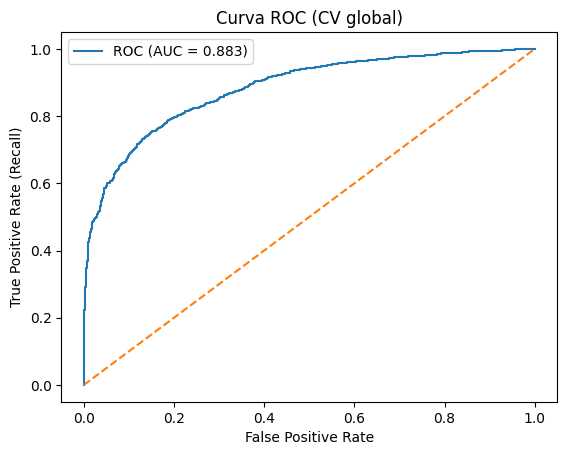

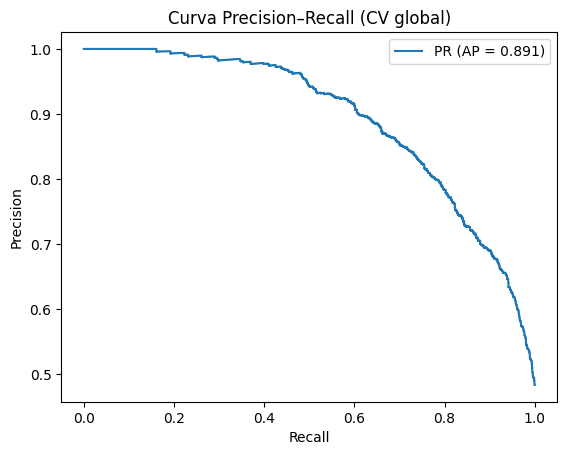

AUC-ROC global: 0.883
PR-AUC (Average Precision) global: 0.891


In [18]:
# @title
# Configuración y evaluación del modelo de Regresión Logística (base)

# Crea un pipeline para el modelo de regresión logística base.
log_reg_base = Pipeline(steps=[
    # Primer paso del pipeline: preprocesamiento de datos utilizando el preprocessor_base definido previamente.
    ("preprocess", preprocessor_base),
    # Segundo paso del pipeline: el clasificador de Regresión Logística.
    ("clf", LogisticRegression(
        penalty="l2",   # Especifica la regularización L2 (Ridge) para evitar el sobreajuste.
        C=1e6,          # C es el inverso de la fuerza de regularización; un valor grande implica poca regularización.
        solver="lbfgs", # Algoritmo a usar para la optimización.
        max_iter=1000   # Número máximo de iteraciones para que converja el optimizador.
    ))
])

# Evalúa el modelo de regresión logística base usando la función evaluate_model_cv.
# Pasa el pipeline del modelo, las características (X), la variable objetivo (y),
# y especifica el número de divisiones para la validación cruzada (5).
results_base = evaluate_model_cv(log_reg_base, X, y, cv_splits=5)

### Estimación de parámetros de Modelo de Regresión Logística Base.

In [19]:
# @title
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Re-create the preprocessor (defined in b0b0ea5b)
# This ensures we use the exact same setup as log_reg_base
numeric_transformer_base = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop='if_binary')) # Added drop='if_binary' to prevent multicollinearity
])

preprocessor_for_statsmodels = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_base, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Re-create and fit a Logistic Regression pipeline on the full dataset
# This model will be used solely for parameter interpretation with statsmodels
full_data_log_reg_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_for_statsmodels),
    ("clf", LogisticRegression(
        penalty="l2",
        C=1e6,
        solver="lbfgs",
        max_iter=1000
    ))
])

# Fit the pipeline on the full X and y
full_data_log_reg_pipeline.fit(X, y)

# Extract the fitted preprocessor and classifier
fitted_preprocessor = full_data_log_reg_pipeline.named_steps['preprocess']
fitted_logistic_clf = full_data_log_reg_pipeline.named_steps['clf']

# Transform X using the fitted preprocessor
X_transformed_for_statsmodels = fitted_preprocessor.transform(X)

# Get feature names after preprocessing
# ColumnTransformer.get_feature_names_out() for names
feature_names_out = fitted_preprocessor.get_feature_names_out()

# Convert X_transformed to a DataFrame for statsmodels with proper column names
X_transformed_df_for_statsmodels = pd.DataFrame(X_transformed_for_statsmodels, columns=feature_names_out, index=X.index)

# Add a constant (intercept) column to the transformed data
X_transformed_df_for_statsmodels = sm.add_constant(X_transformed_df_for_statsmodels)

# Fit the logistic regression model using statsmodels for detailed statistics
logit_model_sm = sm.Logit(y, X_transformed_df_for_statsmodels)
result_sm = logit_model_sm.fit(disp=0) # disp=0 to suppress optimization output

# Extraer los resultados
params = result_sm.params
std_err = result_sm.bse
p_values = result_sm.pvalues
conf_int = result_sm.conf_int()
odds_ratios = np.exp(params)
lower_ci = np.exp(conf_int[0])
upper_ci = np.exp(conf_int[1])

# Create a DataFrame for display
summary_df = pd.DataFrame({
    'Estimado': params,
    'Error Estándar': std_err,
    'Valor-p': p_values,
    'OR (Odds Ratio)': odds_ratios,
    'CI 95% Inferior': lower_ci,
    'CI 95% Superior': upper_ci
})

# Add significance stars
summary_df['Significancia'] = ''
summary_df.loc[summary_df['Valor-p'] < 0.05, 'Significancia'] = '*'
summary_df.loc[summary_df['Valor-p'] < 0.01, 'Significancia'] = '**'
summary_df.loc[summary_df['Valor-p'] < 0.001, 'Significancia'] = '***'

print("Tabla de Parámetros del Modelo Regresión Logística (Base) con Estadísticas:")
display(summary_df.round(4))

Tabla de Parámetros del Modelo Regresión Logística (Base) con Estadísticas:


,Estimado,Error Estándar,Valor-p,OR (Odds Ratio),CI 95% Inferior,CI 95% Superior,Significancia
const,0.0236,0.1007,0.8145,1.0239,0.8405,1.2474,
num__EDAD,1.7877,0.0797,0.0000,5.9758,5.1111,6.9868,***
num__PESO,0.1779,0.1138,0.1182,1.1946,0.9557,1.4933,
num__TALLA,-0.3363,0.0847,0.0001,0.7144,0.6052,0.8433,***
num__CC,0.3836,0.1037,0.0002,1.4675,1.1976,1.7983,***
num__PAS,0.5747,0.0714,0.0000,1.7766,1.5446,2.0435,***
num__PAD,-0.4100,0.0674,0.0000,0.6637,0.5816,0.7573,***
num__CT,-0.3515,0.0492,0.0000,0.7037,0.6389,0.7749,***
cat__SEXO_1,-0.0466,0.1445,0.7471,0.9545,0.7190,1.2670,


## Modelo de Regresión Logística con Polinomios.

Matriz de confusión global (todos los folds):
[[1339  241]
 [ 360 1118]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.788     0.847     0.817      1580
           1      0.823     0.756     0.788      1478

    accuracy                          0.803      3058
   macro avg      0.805     0.802     0.802      3058
weighted avg      0.805     0.803     0.803      3058



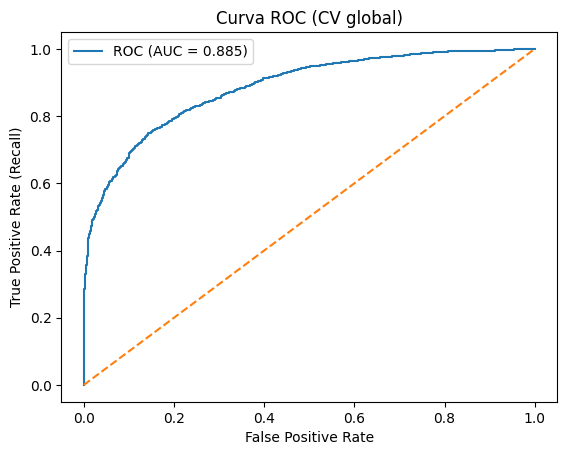

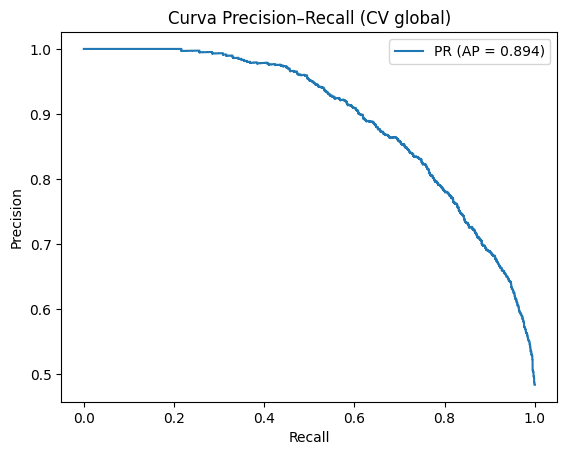

AUC-ROC global: 0.885
PR-AUC (Average Precision) global: 0.894


In [20]:
# @title
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# 1) Transformador numérico optimizado
numeric_transformer_poly = Pipeline(steps=[
    # Primero genero términos polinomiales
    ("poly", PolynomialFeatures(
        degree=2,          # empezar con grado 2
        include_bias=False,
        interaction_only=False
    )),
    # Luego escalo TODOS los términos generados
    ("scaler", StandardScaler())
])

# 2) Preprocesador combinado
preprocessor_poly = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_poly, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"
)

# 3) Modelo de regresión logística con regularización razonable
log_reg_poly = Pipeline(steps=[
    ("preprocess", preprocessor_poly),
    ("clf", LogisticRegression(
        penalty="l2",
        C=1.0,            # regularización estándar
        solver="lbfgs",
        max_iter=1000
    ))
])

# 4) Evaluación con  función de CV
results_poly = evaluate_model_cv(log_reg_poly, X, y, cv_splits=5)


### Flujo completo, ordenado y reproducible de preparación de datos + modelamiento predictivo, orientado a un modelo de regresión logística.

In [21]:
# @title
base_pipeline_poly = Pipeline(steps=[
    ("preprocess", preprocessor_poly),
    ("clf", LogisticRegression(max_iter=1000))
])


### Definición del espacio de búsqueda de hiperparámetros. regularización L2 (Ridge)

In [22]:
# @title
param_grid_l2 = {
    "clf__penalty": ["l2"],
    "clf__solver": ["lbfgs"],
    "clf__C": [0.01, 0.1, 1.0, 10.0]
}

grid_l2 = GridSearchCV(
    base_pipeline_poly,
    param_grid_l2,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring="average_precision",  # PR-AUC
    n_jobs=-1
)

grid_l2.fit(X, y)

print("Mejores hiperparámetros (L2):", grid_l2.best_params_)
print("Mejor PR-AUC medio (L2):", grid_l2.best_score_)

best_model_l2 = grid_l2.best_estimator_


Mejores hiperparámetros (L2): {'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Mejor PR-AUC medio (L2): 0.8942914447961376


### Definición del espacio de búsqueda de hiperparámetros, regularización L1 (Lasso).

In [23]:
# @title
param_grid_l1 = {
    "clf__penalty": ["l1"],
    "clf__solver": ["liblinear"],
    "clf__C": [0.01, 0.1, 1.0, 10.0]
}

grid_l1 = GridSearchCV(
    base_pipeline_poly,
    param_grid_l1,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring="average_precision",
    n_jobs=-1
)

grid_l1.fit(X, y)

print("Mejores hiperparámetros (L1):", grid_l1.best_params_)
print("Mejor PR-AUC medio (L1):", grid_l1.best_score_)

best_model_l1 = grid_l1.best_estimator_


Mejores hiperparámetros (L1): {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Mejor PR-AUC medio (L1): 0.8949874064008883


### Presentación de mejores modelos de Regresión Logistica L1 y L2.

Matriz de confusión global (todos los folds):
[[1339  241]
 [ 360 1118]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.788     0.847     0.817      1580
           1      0.823     0.756     0.788      1478

    accuracy                          0.803      3058
   macro avg      0.805     0.802     0.802      3058
weighted avg      0.805     0.803     0.803      3058



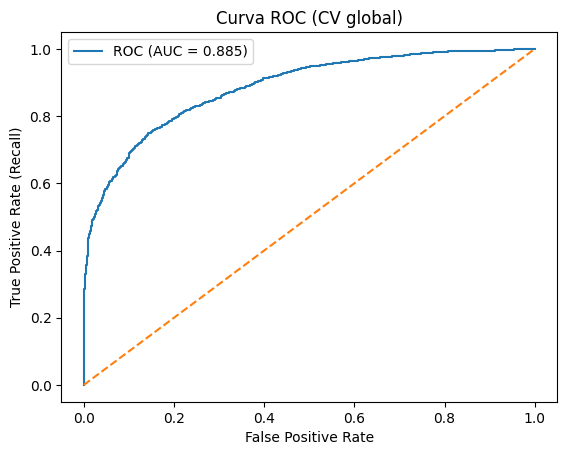

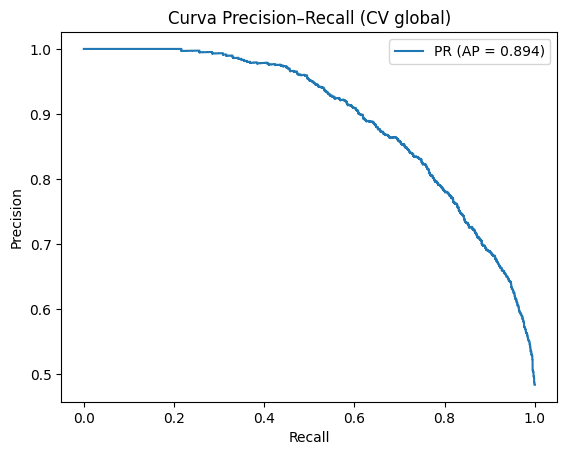

AUC-ROC global: 0.885
PR-AUC (Average Precision) global: 0.894


In [24]:
# @title
results_l2 = evaluate_model_cv(best_model_l2, X, y, cv_splits=5)

Matriz de confusión global (todos los folds):
[[1345  235]
 [ 364 1114]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.787     0.851     0.818      1580
           1      0.826     0.754     0.788      1478

    accuracy                          0.804      3058
   macro avg      0.806     0.802     0.803      3058
weighted avg      0.806     0.804     0.803      3058



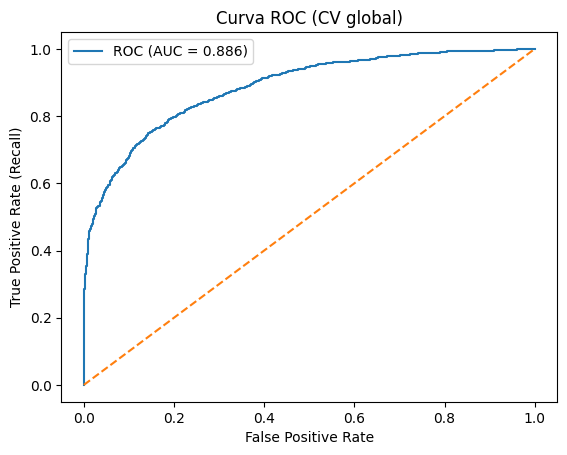

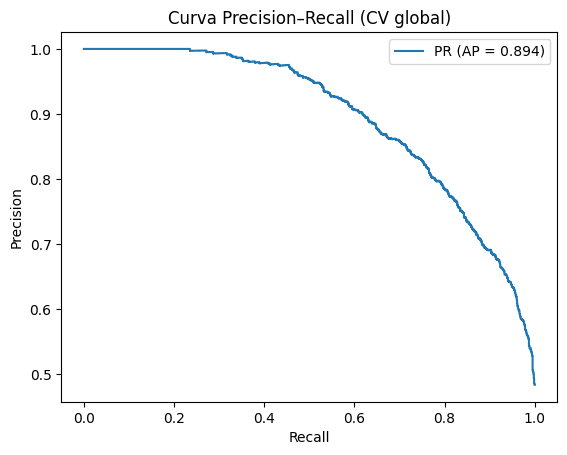

AUC-ROC global: 0.886
PR-AUC (Average Precision) global: 0.894


In [25]:
results_l1 = evaluate_model_cv(best_model_l1, X, y, cv_splits=5)

## Modelo KNN (K-Nearest Neighbors o Vecinos más Cercanos)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Mejores hiperparámetros (KNN): {'clf__n_neighbors': 21}
Mejor PR-AUC medio (KNN): 0.8654700783873626
Matriz de confusión global (todos los folds):
[[1336  244]
 [ 433 1045]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.755     0.846     0.798      1580
           1      0.811     0.707     0.755      1478

    accuracy                          0.779      3058
   macro avg      0.783     0.776     0.777      3058
weighted avg      0.782     0.779     0.777      3058



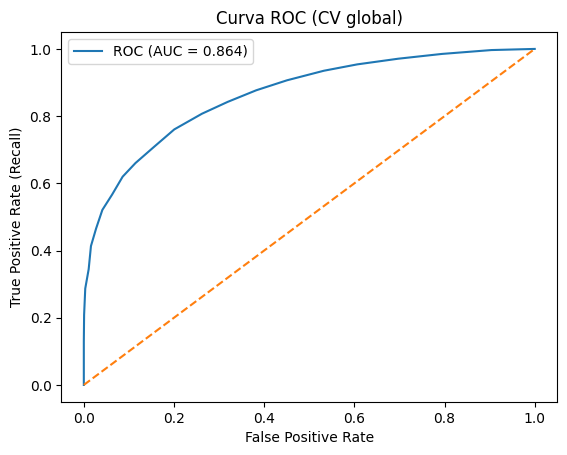

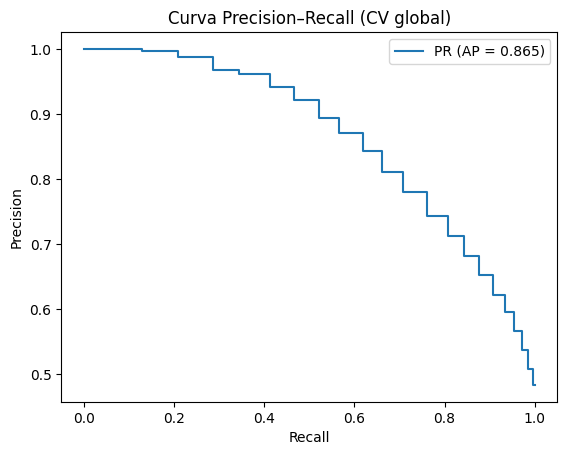

AUC-ROC global: 0.864
PR-AUC (Average Precision) global: 0.865


In [26]:
# @title
from sklearn.neighbors import KNeighborsClassifier

# Definir el pipeline base para KNN
base_pipeline_knn = Pipeline(steps=[
    ("preprocess", preprocessor_base),
    ("clf", KNeighborsClassifier())
])

# Definir el espacio de búsqueda de hiperparámetros para KNN
param_grid_knn = {
    'clf__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
}

# Configurar GridSearchCV para optimizar KNN
grid_knn = GridSearchCV(
    base_pipeline_knn,
    param_grid_knn,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='average_precision',  # Optimizar por PR-AUC
    n_jobs=-1,
    verbose=1
)

# Entrenar el GridSearchCV
grid_knn.fit(X, y)

print("Mejores hiperparámetros (KNN):", grid_knn.best_params_)
print("Mejor PR-AUC medio (KNN):", grid_knn.best_score_)

best_model_knn = grid_knn.best_estimator_

# Evaluar el mejor modelo KNN
results_knn = evaluate_model_cv(best_model_knn, X, y, cv_splits=5)

## Modelo SVM (Máquina de Vectores de Soporte)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores hiperparámetros (SVM): {'clf__C': 10, 'clf__kernel': 'linear'}
Mejor PR-AUC medio (SVM): 0.8915568039488763
Matriz de confusión global (todos los folds):
[[1310  270]
 [ 337 1141]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.795     0.829     0.812      1580
           1      0.809     0.772     0.790      1478

    accuracy                          0.802      3058
   macro avg      0.802     0.801     0.801      3058
weighted avg      0.802     0.802     0.801      3058



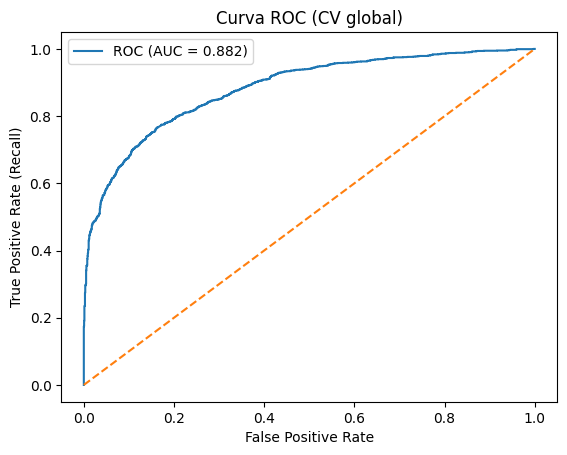

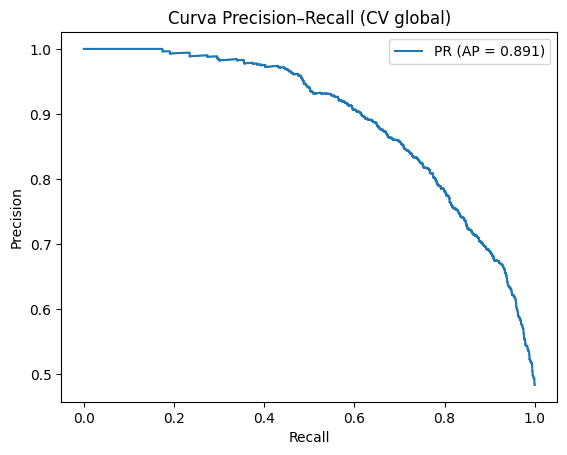

AUC-ROC global: 0.882
PR-AUC (Average Precision) global: 0.891


In [27]:
# @title
from sklearn.svm import SVC

# Definir el pipeline base para SVM
base_pipeline_svm = Pipeline(steps=[
    ("preprocess", preprocessor_base),
    ("clf", SVC(probability=True, random_state=42))
])

# Definir el espacio de búsqueda de hiperparámetros para SVM

param_grid_svm = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf']
}

# Configurar GridSearchCV para optimizar SVM
grid_svm = GridSearchCV(
    base_pipeline_svm,
    param_grid_svm,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='average_precision',  # Optimizar por PR-AUC
    n_jobs=-1,
    verbose=1
)

# Entrenar el GridSearchCV
grid_svm.fit(X, y)

print("Mejores hiperparámetros (SVM):", grid_svm.best_params_)
print("Mejor PR-AUC medio (SVM):", grid_svm.best_score_)

best_model_svm = grid_svm.best_estimator_

# Evaluar el mejor modelo SVM
results_svm = evaluate_model_cv(best_model_svm, X, y, cv_splits=5)

## Modelo XGBoost (Extreme Gradient Boosting)

### XGBoost (Extreme Gradient Boosting), Modelo base.

Matriz de confusión global (todos los folds):
[[1311  269]
 [ 367 1111]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.781     0.830     0.805      1580
           1      0.805     0.752     0.777      1478

    accuracy                          0.792      3058
   macro avg      0.793     0.791     0.791      3058
weighted avg      0.793     0.792     0.792      3058



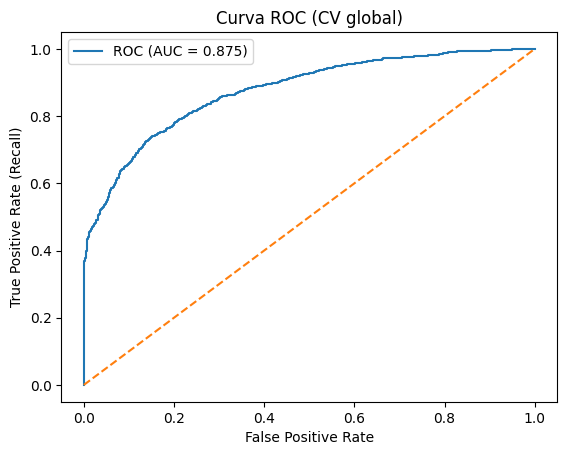

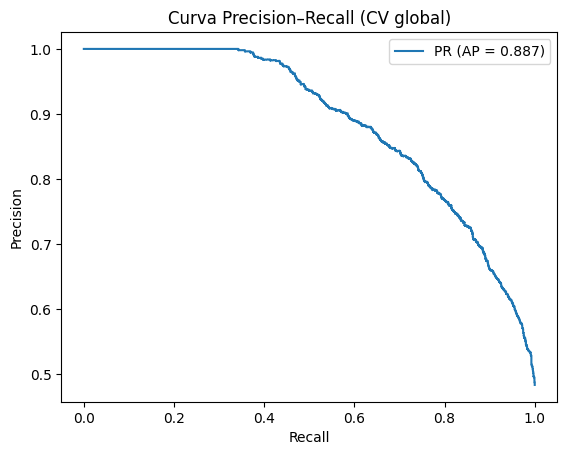

AUC-ROC global: 0.875
PR-AUC (Average Precision) global: 0.887


In [28]:
# @title
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# X: DataFrame con columnas EDAD, PESO, TALLA, CC, PAS, PAD, CT, SEXO
# y: por ejemplo, variable binaria: 1 = alto riesgo CV, 0 = no alto riesgo

model_xgb = Pipeline(steps=[
    ("preprocessor", preprocessor_base),
    ("classifier", XGBClassifier(
        n_estimators=200,
        max_depth=4,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

model_xgb.fit(X, y)

# Predicción de riesgo (clase)
y_pred = model_xgb.predict(X)

# Probabilidad de evento (ej. riesgo alto)
y_proba = model_xgb.predict_proba(X)[:, 1]

results_base = evaluate_model_cv(model_xgb, X, y, cv_splits=5)

### Definición del espacio de búsqueda de hiperparámetros. Modelo XGBoost (Extreme Gradient Boosting)

In [29]:
# @title
param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.01, 0.025, 0.05, 0.1, 0.15, 0.2],
    'classifier__subsample': [0.7, 0.8, 0.9]
}

grid_xgb = GridSearchCV(
    model_xgb,
    param_grid_xgb,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='average_precision', # Usamos PR-AUC como métrica de optimización
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(X, y)

print("Mejores hiperparámetros (XGBoost):", grid_xgb.best_params_)
print("Mejor PR-AUC medio (XGBoost):", grid_xgb.best_score_)

best_model_xgb = grid_xgb.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Mejores hiperparámetros (XGBoost): {'classifier__learning_rate': 0.025, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'classifier__subsample': 0.7}
Mejor PR-AUC medio (XGBoost): 0.8952524069079366


Matriz de confusión global (todos los folds):
[[1329  251]
 [ 357 1121]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.788     0.841     0.814      1580
           1      0.817     0.758     0.787      1478

    accuracy                          0.801      3058
   macro avg      0.803     0.800     0.800      3058
weighted avg      0.802     0.801     0.801      3058



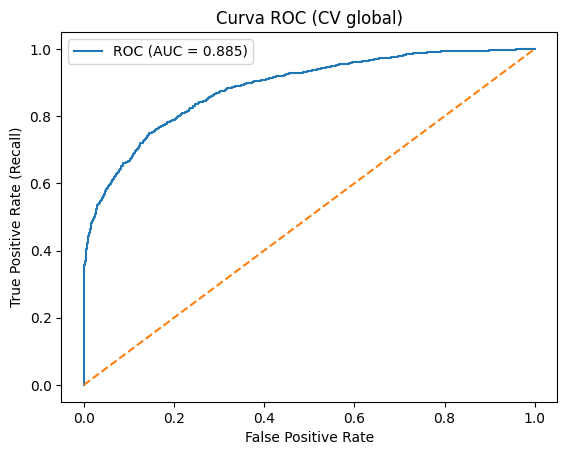

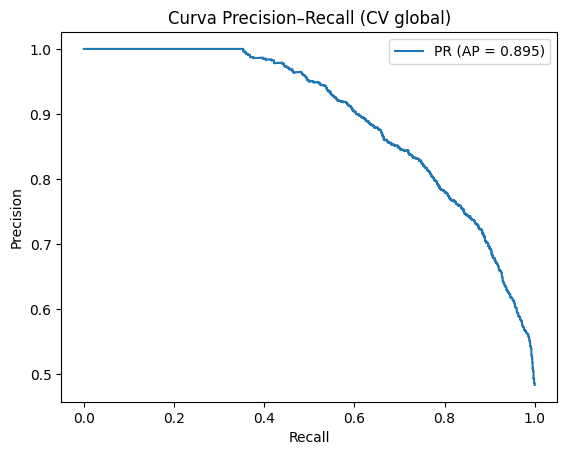

AUC-ROC global: 0.885
PR-AUC (Average Precision) global: 0.895


In [30]:
# @title
results_xgb = evaluate_model_cv(best_model_xgb, X, y, cv_splits=5)

### Importancia de las Caracteristicas, Modelo Optimizado XGBoost (Extreme Gradient Boosting).

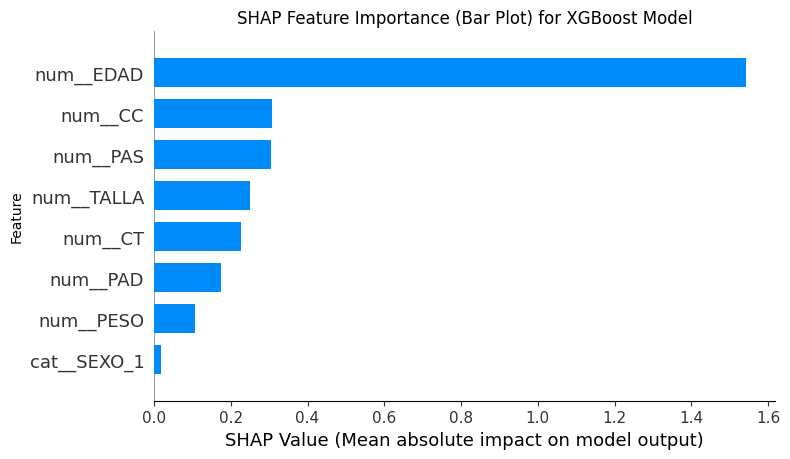

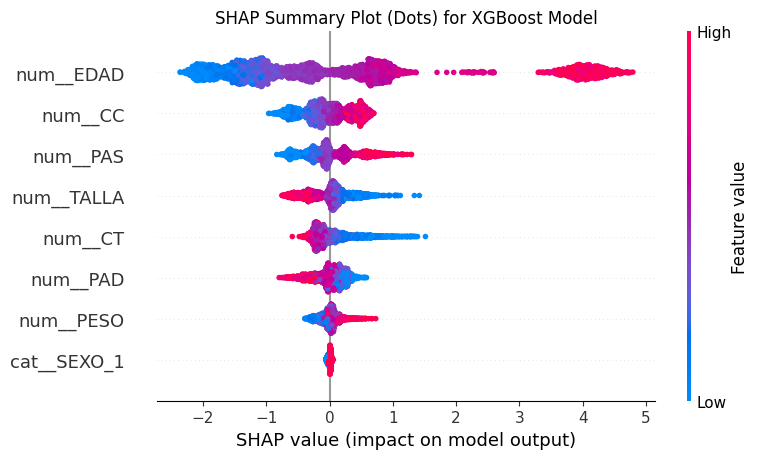

SHAP summary bar plot and dot plot generated successfully.


In [31]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import shap

# Extract the preprocessor and the classifier from the best_model_xgb pipeline
preprocessor = best_model_xgb.named_steps['preprocessor']
xgb_classifier = best_model_xgb.named_steps['classifier']

# Transform the input features X using the preprocessor
X_transformed = preprocessor.transform(X)

# Get feature names after preprocessing
feature_names_out = preprocessor.get_feature_names_out()

# Convert X_transformed to a DataFrame for SHAP analysis with proper column names
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names_out)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(xgb_classifier)

# Compute SHAP values
shap_values = explainer.shap_values(X_transformed_df)

# Generate a SHAP summary plot (bar plot) to visualize the feature importance and impact
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_transformed_df, plot_type="bar", show=False)
plt.title('SHAP Feature Importance (Bar Plot) for XGBoost Model')
plt.xlabel('SHAP Value (Mean absolute impact on model output)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Generate a SHAP Summary Plot (Dots) to visualize the feature importance and impact per instance
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_transformed_df, show=False) # Default plot_type is "dot"
plt.title('SHAP Summary Plot (Dots) for XGBoost Model')
plt.tight_layout()
plt.show()

print("SHAP summary bar plot and dot plot generated successfully.")


- **Edad (num__EDAD)**

Es la variable con mayor impacto.

Valores altos de edad (rojo) se asocian claramente a valores SHAP positivos, incrementando fuertemente la probabilidad de progresión a PSCV.

Valores bajos (azul) se concentran en SHAP negativos.

Interpretación clínica:
Existe una relación directa, progresiva y consistente entre edad y riesgo cardiovascular. El modelo capta adecuadamente el efecto del ciclo vital, sin umbrales artificiales.

Implicancia APS:
La edad debe ser el eje estructural de la estratificación poblacional, especialmente para focalizar prevención secundaria.

- **Circunferencia de cintura (num__CC)**

Valores altos de CC desplazan la predicción hacia riesgo positivo.

Se observa dispersión, indicando interacción con otras variables (edad, PAS).

Interpretación clínica:
La obesidad central es un determinante crítico del riesgo cardiometabólico, incluso antes de cumplir criterios PSCV formales.

Implicancia APS:
Refuerza la necesidad de medición sistemática y confiable de CC en controles preventivos.

- **Presión arterial sistólica (num__PAS)**

Valores elevados se asocian a aumento del riesgo.

Relación clara y clínicamente coherente.

Interpretación:
La PAS actúa como señal temprana de progresión cardiovascular, incluso en rangos subhipertensivos.

- **Talla (num__TALLA)**

Valores altos de talla (rojo) se asocian a SHAP negativos.

Valores bajos aumentan levemente el riesgo.

Interpretación técnica:
La talla funciona como factor de ajuste antropométrico; personas de menor estatura presentan mayor riesgo relativo ante iguales niveles de CC y peso.

- **Colesterol total (num__CT)**

Valores altos tienden a aumentar el riesgo, aunque con menor impacto que edad o CC.

Dispersión moderada.

Interpretación clínica:
Confirma su rol como factor de riesgo clásico, pero no dominante en este modelo.

- **Presión arterial diastólica (num__PAD)**

Efecto menor y más simétrico.

Aporta información complementaria a la PAS.

- **Peso (num__PESO)**

Impacto bajo.

El modelo prioriza la distribución de grasa (CC) más que el peso total.

Lectura clínica:
Coherente con la evidencia actual: el peso aislado es un predictor débil del riesgo cardiovascular.

- **Sexo (cat__SEXO_1)**

Efecto prácticamente nulo.

Los puntos se concentran cerca de SHAP = 0.

Interpretación:
Una vez ajustado por variables clínicas, el sexo no discrimina significativamente la progresión a PSCV.

Implicancia:
Reduce el riesgo de sesgos de género en la priorización preventiva.



## Tabla comparativa de desempeño de modelos


In [32]:
# @title
import pandas as pd

# Crear un diccionario con los resultados de cada modelo
model_comparison_data = {
    'Modelo': [
        'Regresión Logística Base',
        'Regresión Logística con Polinomios',
        'Regresión Logística L2 (Optimizada)',
        'Regresión Logística L1 (Optimizada)',
        'XGBoost (Optimizado)',
        'KNN (Optimizado)',
        'SVM (Optimizado)'
    ],
    'AUC-ROC': [
        results_base['roc_auc'],
        results_poly['roc_auc'],
        results_l2['roc_auc'],
        results_l1['roc_auc'],
        results_xgb['roc_auc'],
        results_knn['roc_auc'],
        results_svm['roc_auc']
    ],
    'PR-AUC': [
        results_base['pr_auc'],
        results_poly['pr_auc'],
        results_l2['pr_auc'],
        results_l1['pr_auc'],
        results_xgb['pr_auc'],
        results_knn['pr_auc'],
        results_svm['pr_auc']
    ],
    'Precision (PCV=1)': [
        results_base['precision_1'],
        results_poly['precision_1'],
        results_l2['precision_1'],
        results_l1['precision_1'],
        results_xgb['precision_1'],
        results_knn['precision_1'],
        results_svm['precision_1']
    ],
    'Recall (PCV=1)': [
        results_base['recall_1'],
        results_poly['recall_1'],
        results_l2['recall_1'],
        results_l1['recall_1'],
        results_xgb['recall_1'],
        results_knn['recall_1'],
        results_svm['recall_1']
    ],
    'F1-Score (PCV=1)': [
        results_base['f1_score_1'],
        results_poly['f1_score_1'],
        results_l2['f1_score_1'],
        results_l1['f1_score_1'],
        results_xgb['f1_score_1'],
        results_knn['f1_score_1'],
        results_svm['f1_score_1']
    ]
}

# Crear el DataFrame de comparación
comparison_df = pd.DataFrame(model_comparison_data)

# Mostrar el DataFrame, ordenando por PR-AUC para ver el mejor modelo
display(comparison_df.sort_values(by='PR-AUC', ascending=False))

,Modelo,AUC-ROC,PR-AUC,Precision (PCV=1),Recall (PCV=1),F1-Score (PCV=1)
4,XGBoost (Optimizado),0.884815,0.894811,0.817055,0.758457,0.786667
3,Regresión Logística L1 (Optimizada),0.885986,0.894478,0.825797,0.753721,0.788115
1,Regresión Logística con Polinomios,0.885283,0.893759,0.822664,0.756428,0.788157
2,Regresión Logística L2 (Optimizada),0.885283,0.893759,0.822664,0.756428,0.788157
6,SVM (Optimizado),0.882126,0.890738,0.808646,0.771989,0.789893
0,Regresión Logística Base,0.875316,0.887069,0.805072,0.751691,0.777467
5,KNN (Optimizado),0.864444,0.865008,0.810706,0.707037,0.755331


## Comparación y selección de modelos.

La tabla comparativa muestra que los modelos presentan desempeños altos y muy cercanos entre sí, lo que indica estabilidad del fenómeno y consistencia de las variables utilizadas. El XGBoost optimizado alcanza el mejor equilibrio global, con el PR-AUC más alto, lo que lo posiciona como la alternativa más adecuada para priorizar personas con riesgo de progresión a PSCV en un contexto preventivo. La regresión logística L1 optimizada exhibe un rendimiento prácticamente equivalente, con mayor precisión, lo que reduce falsos positivos y la hace especialmente útil como modelo interpretable y de respaldo clínico. Los modelos logísticos con polinomios y L2 no aportan mejoras relevantes adicionales, pese a su mayor complejidad. El SVM optimizado logra el mayor recall, detectando más casos verdaderos, pero a costa de mayor sobre-clasificación, lo que podría tensionar la capacidad operativa de APS. La regresión logística base y KNN muestran un desempeño inferior y no se recomiendan para uso operativo. En conjunto, los resultados respaldan el uso de XGBoost como modelo principal y de regresión logística L1 como complemento explicativo, alineados con una gestión eficiente y clínicamente coherente del riesgo cardiovascular en APS.



## **Análisis de Varianza (ANOVA) de una via, para comparar todos los modelos, según la metrica F1-Score**

### Función para el cálculo y recolección de los F-scores para la clase positiva (PCV=1) para cada fold.

In [33]:
# @title
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from copy import deepcopy

def get_per_fold_f1_scores(model, X, y, cv_splits=5):
    """
    Calcula y recolecta los F1-scores para la clase positiva (PCV=1)
    para cada fold durante la validación cruzada estratificada k-fold.

    Args:
        model: El modelo de machine learning (ej., un Pipeline de sklearn).
        X (pd.DataFrame): El DataFrame de características.
        y (pd.Series): La serie objetivo.
        cv_splits (int): El número de divisiones para la validación cruzada estratificada k-fold.

    Returns:
        list: Una lista de los F1-scores para la clase positiva para cada fold.
    """
    # Inicializa StratifiedKFold para asegurar que la proporción de clases se mantenga en cada fold
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    f1_scores_per_fold = []

    # Itera sobre cada fold de la validación cruzada
    for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        # Divide los datos en conjuntos de entrenamiento y prueba para el fold actual
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Crea una copia profunda del modelo para asegurar un entrenamiento independiente en cada fold
        model_current_fold = deepcopy(model)
        # Entrena el modelo con los datos de entrenamiento del fold actual
        model_current_fold.fit(X_train, y_train)

        # Realiza predicciones de clase (usando un umbral de 0.5 si el modelo predice probabilidades)
        # Para classification_report, predict() directo suele ser suficiente, o usar el umbral en proba
        if hasattr(model_current_fold, 'predict'):
            y_pred = model_current_fold.predict(X_test)
        elif hasattr(model_current_fold, 'predict_proba'):
            y_pred = (model_current_fold.predict_proba(X_test)[:, 1] >= 0.5).astype(int)
        else:
            raise ValueError("El modelo debe tener un método 'predict' o 'predict_proba'")

        # Obtiene el reporte de clasificación y extrae el F1-score para la clase 1 (positiva)
        report = classification_report(y_test, y_pred, output_dict=True)
        f1_score_class_1 = report['1']['f1-score']
        # Agrega el F1-score del fold a la lista
        f1_scores_per_fold.append(f1_score_class_1)

    return f1_scores_per_fold

print("La función de ayuda 'get_per_fold_f1_scores' fue creada exitosamente.")


La función de ayuda 'get_per_fold_f1_scores' fue creada exitosamente.


### Cálculo y recolección de los F-scores para la clase positiva (PCV=1) para cada fold.

In [34]:
# @title
# Lista de nombres de los modelos que se evaluarán
model_names = [
    'Regresión Logística Base',
    'Regresión Logística con Polinomios',
    'Regresión Logística L2 (Optimizada)',
    'Regresión Logística L1 (Optimizada)',
    'KNN (Optimizado)',
    'SVM (Optimizado)',
    'XGBoost (Optimizado)'
]

# Diccionario que mapea los nombres de los modelos a sus respectivas instancias de Pipeline
# Estas instancias de Pipeline ya han sido entrenadas o configuradas previamente
models = {
    'Regresión Logística Base': log_reg_base,
    'Regresión Logística con Polinomios': log_reg_poly,
    'Regresión Logística L2 (Optimizada)': best_model_l2,
    'Regresión Logística L1 (Optimizada)': best_model_l1,
    'KNN (Optimizado)': best_model_knn,
    'SVM (Optimizado)': best_model_svm,
    'XGBoost (Optimizado)': best_model_xgb
}

# Diccionario para almacenar los F1-scores de la clase positiva (PCV=1) para cada modelo y fold
f1_scores_data = {}
# Itera sobre cada modelo en el diccionario 'models'
for name, model in models.items():
    print(f"Recolectando F1-scores para {name}...")
    # Llama a la función auxiliar para obtener los F1-scores por fold
    # y los almacena en el diccionario f1_scores_data
    f1_scores_data[name] = get_per_fold_f1_scores(model, X, y, cv_splits=5)
    print(f"  F1-scores para {name}: {f1_scores_data[name]}")

# Convierte el diccionario de F1-scores a un DataFrame de pandas para facilitar su manejo y análisis
f1_scores_df = pd.DataFrame(f1_scores_data)
print("\nF1-scores recolectados para todos los modelos:")
display(f1_scores_df)

Recolectando F1-scores para Regresión Logística Base...
  F1-scores para Regresión Logística Base: [0.8069565217391305, 0.7607573149741824, 0.7697841726618705, 0.8102564102564103, 0.7854671280276817]
Recolectando F1-scores para Regresión Logística con Polinomios...
  F1-scores para Regresión Logística con Polinomios: [0.8049645390070922, 0.7764298093587522, 0.7787934186471663, 0.8096885813148789, 0.7705779334500875]
Recolectando F1-scores para Regresión Logística L2 (Optimizada)...
  F1-scores para Regresión Logística L2 (Optimizada): [0.8049645390070922, 0.7764298093587522, 0.7787934186471663, 0.8096885813148789, 0.7705779334500875]
Recolectando F1-scores para Regresión Logística L1 (Optimizada)...
  F1-scores para Regresión Logística L1 (Optimizada): [0.8057040998217468, 0.7797202797202797, 0.7728937728937729, 0.8131487889273357, 0.7697715289982425]
Recolectando F1-scores para KNN (Optimizado)...
  F1-scores para KNN (Optimizado): [0.7567567567567568, 0.759493670886076, 0.74060150375

,Regresión Logística Base,Regresión Logística con Polinomios,Regresión Logística L2 (Optimizada),Regresión Logística L1 (Optimizada),KNN (Optimizado),SVM (Optimizado),XGBoost (Optimizado)
0,0.806957,0.804965,0.804965,0.805704,0.756757,0.804921,0.792185
1,0.760757,0.776430,0.776430,0.779720,0.759494,0.763066,0.762069
2,0.769784,0.778793,0.778793,0.772894,0.740602,0.773960,0.773140
3,0.810256,0.809689,0.809689,0.813149,0.763441,0.807560,0.812925
4,0.785467,0.770578,0.770578,0.769772,0.755712,0.783217,0.792254


### Análisis de Varianza (ANOVA) de una via y pruebas de comparación múltiple de promedios (post-hoc de Tukey HSD).

In [35]:
# @title
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Preparar los datos para el análisis ANOVA
# anova_data contendrá una lista de arrays, donde cada array son los F1-scores de un modelo.
anova_data = [f1_scores_df[col].values for col in f1_scores_df.columns]

# Realizar la prueba ANOVA de una vía (One-way ANOVA test)
# Compara las medias de dos o más grupos para determinar si al menos uno de ellos es significativamente diferente.
f_statistic, p_value = f_oneway(*anova_data)

# Imprimir los resultados de la estadística F y el valor p del ANOVA
print(f"ANOVA F-statistic: {f_statistic:.4f}")
print(f"ANOVA p-value: {p_value:.4f}")

# Comprobar la significancia estadística del valor p
# Si p-value < 0.05, indica que hay diferencias significativas entre al menos dos medias de grupo.
if p_value < 0.05:
    print("\nEl valor p de ANOVA es menor que 0.05, lo que indica una diferencia estadísticamente significativa entre los F1-scores promedio de al menos dos modelos.")
    print("Procediendo con la prueba post-hoc de Tukey HSD.")

    # Preparar los datos para la prueba post-hoc de Tukey HSD:
    # Se apilan todos los F1-scores en un solo array y se crean las etiquetas de grupo correspondientes.
    f1_scores_stacked = f1_scores_df.stack().values
    model_labels = f1_scores_df.stack().index.get_level_values(1).values

    # Realizar la prueba post-hoc de Tukey HSD (Honest Significant Difference)
    # Esta prueba se utiliza para realizar comparaciones por pares entre las medias de los grupos
    # después de que la prueba ANOVA ha indicado una diferencia significativa general.
    tukey_results = pairwise_tukeyhsd(endog=f1_scores_stacked, groups=model_labels, alpha=0.05)

    # Imprimir los resultados de la prueba de Tukey HSD
    print("\nResultados de la prueba Post-hoc de Tukey HSD:")
    print(tukey_results)

    # Resumir la interpretación de los resultados de Tukey HSD
    print("\nInterpretación de Tukey HSD:")
    print("La columna 'reject' indica si la hipótesis nula (de que las medias de los dos grupos son iguales) es rechazada. Si es 'True', existe una diferencia estadísticamente significativa entre los F1-scores de ese par de modelos.")

# Si el valor p de ANOVA no es significativo, se concluye que no hay diferencias significativas entre las medias.
else:
    print("\nEl valor p de ANOVA no es menor que 0.05, lo que indica que no hay una diferencia estadísticamente significativa entre los F1-scores promedio de los modelos.")

ANOVA F-statistic: 2.2086
ANOVA p-value: 0.0720

El valor p de ANOVA no es menor que 0.05, lo que indica que no hay una diferencia estadísticamente significativa entre los F1-scores promedio de los modelos.


### Comentario:

Los resultados del Análisis de Varianza (ANOVA) mostraron un valor p de 0.0720. Dado que este valor es mayor que el umbral de significancia de 0.05, concluimos que no hay una diferencia estadísticamente significativa entre los F1-scores promedio de los diferentes modelos evaluados. Esto significa que, con base en esta prueba, no podemos afirmar que un modelo rinda significativamente mejor que otro en términos de F1-score. Por lo tanto, no es necesario realizar una prueba post-hoc de Tukey HSD, ya que no se encontraron diferencias significativas globales que necesiten ser exploradas en pares.

## Determinación del punto de corte (umbral de clasificación)

Para el **modelo XGBoost optimizado** se recalculó la curva ROC a partir de las probabilidades agregadas en los cinco folds de validación cruzada, estimando el **índice de Youden** (sensibilidad + especificidad − 1) para cada posible umbral. El punto de corte óptimo se definió como aquel que maximizó dicho índice, obteniéndose un umbral cercano a 0,52 (probabilidad de pertenecer a PCV=1). Este valor se propone como punto de corte operativo para clasificar a las personas en alto riesgo de progresión a PSCV, balanceando sensibilidad y especificidad en un contexto de priorización preventiva en APS.

El umbral óptimo (Indice de Youden) para el modelo XGBoost es: 0.5197


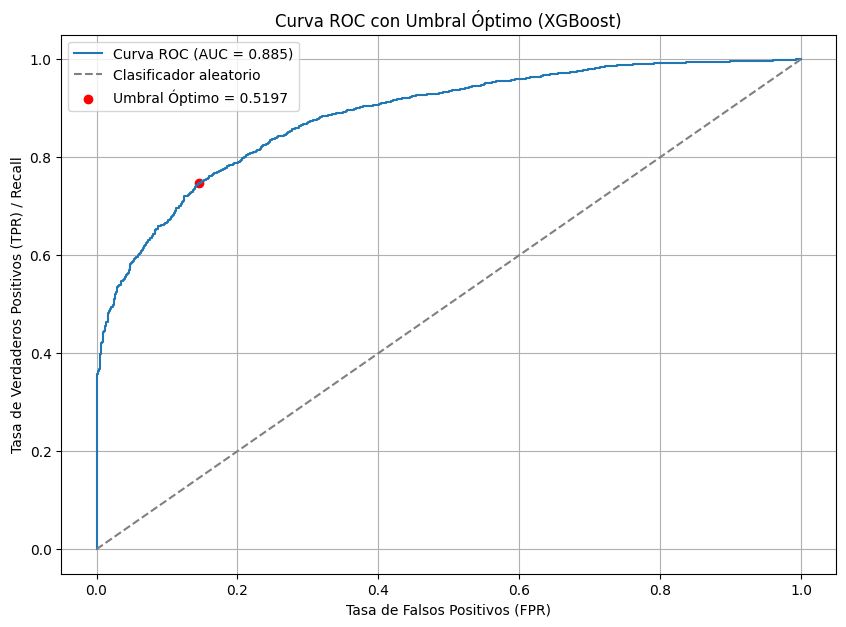

In [36]:
# @title
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

# Re-ejecutar la validación cruzada para obtener y_true_all y y_proba_all
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_true_all = []
y_proba_all = []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Crear una nueva instancia del best_model_xgb para que se re-entrene en cada fold
    from copy import deepcopy
    model_current_fold = deepcopy(best_model_xgb)
    model_current_fold.fit(X_train, y_train)
    y_proba = model_current_fold.predict_proba(X_test)[:, 1]

    y_true_all.extend(y_test)
    y_proba_all.extend(y_proba)

y_true_all = np.array(y_true_all)
y_proba_all = np.array(y_proba_all)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true_all, y_proba_all)

# Calcular el Índice de Youden
youden_index = tpr - fpr

# Encontrar el umbral óptimo (donde el Índice de Youden es máximo)
optimal_threshold_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_threshold_idx]

print(f"El umbral óptimo (Indice de Youden) para el modelo XGBoost es: {optimal_threshold:.4f}")

# Graficar la curva ROC y marcar el umbral óptimo
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {results_xgb["roc_auc"]:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Clasificador aleatorio')
plt.scatter(
    fpr[optimal_threshold_idx],
    tpr[optimal_threshold_idx],
    marker='o',
    color='red',
    label=f'Umbral Óptimo = {optimal_threshold:.4f}'
)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR) / Recall')
plt.title('Curva ROC con Umbral Óptimo (XGBoost)')
plt.legend()
plt.grid()
plt.show()

### Modelo Optimizado XGBoost (Extreme Gradient Boosting), Metricas de evaluación y curvas ROC y Precisión-Recall, usando Umbral Óptimo.

Matriz de confusión global (todos los folds):
[[1351  229]
 [ 372 1106]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.784     0.855     0.818      1580
           1      0.828     0.748     0.786      1478

    accuracy                          0.803      3058
   macro avg      0.806     0.802     0.802      3058
weighted avg      0.806     0.803     0.803      3058



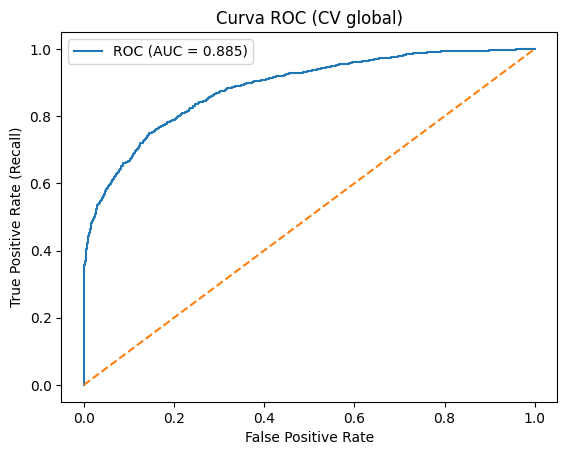

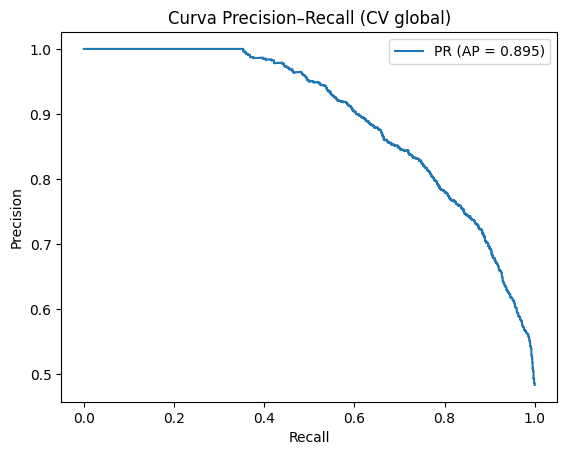

AUC-ROC global: 0.885
PR-AUC (Average Precision) global: 0.895


In [37]:
# @title
optimal_threshold = 0.5197
results_xgb_optimized_threshold = evaluate_model_cv(best_model_xgb, X, y, cv_splits=5, threshold=optimal_threshold)


# Discusión

Los resultados obtenidos con los modelos actualizados confirman que la progresión hacia criterios del Programa de Salud Cardiovascular (PSCV) puede predecirse de manera confiable utilizando exclusivamente registros clínicos rutinarios de Atención Primaria de Salud. Los desempeños observados son altos y consistentes entre modelos, con valores de AUC-ROC cercanos a 0,88 y PR-AUC en torno a 0,89, lo que evidencia una adecuada capacidad discriminatoria y estabilidad del fenómeno analizado.

El modelo XGBoost optimizado destacó por presentar el mejor equilibrio global entre capacidad predictiva y utilidad operativa, particularmente por su mayor PR-AUC, métrica prioritaria en contextos preventivos donde el foco está en la correcta identificación de personas en riesgo. La regresión logística L1 optimizada mostró un rendimiento prácticamente equivalente, con una ligera ventaja en precisión, lo que refuerza su valor como modelo interpretable y clínicamente trazable, especialmente relevante para auditoría, validación institucional y apoyo a la toma de decisiones en APS.

Los modelos logísticos con términos polinomiales y regularización L2 no evidenciaron mejoras sustantivas respecto de L1, sugiriendo que la complejidad adicional no se traduce en beneficios operativos claros. Por su parte, el SVM optimizado alcanzó el mayor nivel de recall, lo que podría ser útil en estrategias de pesquisa amplia, aunque con el riesgo de aumentar falsos positivos y sobrecargar la capacidad asistencial. Los modelos base y KNN presentaron un desempeño inferior, confirmando su menor adecuación para este tipo de problema clínico-poblacional.

En conjunto, estos hallazgos respaldan la implementación del modelo XGBoost como herramienta principal de apoyo a la gestión del riesgo cardiovascular en APS, manteniendo la regresión logística L1 como referencia explicativa. No obstante, los resultados deben interpretarse considerando las limitaciones inherentes a la ausencia de variables conductuales, bioquímicas avanzadas y determinantes sociales, así como la necesidad de validación externa en otros territorios del Servicio de Salud Chiloé.

## Limitaciones del trabajo


Si bien el modelo desarrollado presenta un buen desempeño predictivo para la identificación temprana de usuarios con riesgo de progresión a criterios del Programa de Salud Cardiovascular (PSCV), es importante reconocer sus principales limitaciones.

En primer lugar, el modelo fue entrenado utilizando datos históricos y locales, provenientes de registros clínicos de Atención Primaria de Salud (APS) de la comuna de Quellón. Esto implica que su capacidad de generalización a otras comunas o contextos poblacionales podría verse limitada si existen diferencias demográficas, epidemiológicas u operativas relevantes.

En segundo lugar, el conjunto de variables disponibles corresponde principalmente a parámetros clínicos y antropométricos básicos, por lo que el modelo no incorpora información sobre hábitos de vida, tales como alimentación, actividad física, consumo de tabaco o adherencia a tratamientos, ni tampoco considera el uso de fármacos, los cuales pueden modificar sustancialmente el riesgo cardiovascular real de una persona.

Eventualmente, puede haber un sesgo en catalogar pacientes en quienes se realizó el EMPA y que no están en control, como sin riesgo de desarrollar DM, HTA o DLP. Ello a pesar de la detección y exclusión de datos anómalos, ya que, eventualmente, podría haber falsos negativos (pacientes que creímos no estaban en riesgo de desarrollar DM, HTA o DLP, y sí lo están).

Finalmente, es fundamental destacar que el resultado del modelo corresponde a una estimación probabilística de riesgo y no constituye un diagnóstico clínico. El modelo debe entenderse como una herramienta de apoyo a la toma de decisiones y no como un sustituto del juicio clínico de los profesionales de salud.


Fuente: https://dx.doi.org/10.4067/S0718-85602018000200126

## Propuesta de despliegue del modelo en un contexto real

Desde una perspectiva conceptual, el modelo desarrollado podría ser desplegado como una herramienta de apoyo a la gestión del riesgo cardiovascular en APS, integrada al flujo habitual de atención preventiva.

El proceso de despliegue consideraría como entrada los datos clínicos básicos obtenidos a partir del Examen de Medicina Preventiva del Adulto (EMPA), tales como edad, presión arterial, circunferencia de cintura, colesterol total y variables antropométricas.

Estos datos serían procesados por el modelo predictivo entrenado, el cual generaría como salida un score de riesgo de progresión a PSCV, expresado como una probabilidad. Dicho score permitiría priorizar a los usuarios con mayor riesgo para controles más oportunos, intervenciones preventivas focalizadas o seguimiento clínico más estrecho.

En términos operativos, se recomienda que el modelo sea reentrenado de forma periódica (por ejemplo, anual), incorporando nuevos datos para mantener su desempeño y adaptarse a cambios poblacionales o epidemiológicos.

Finalmente, el uso del modelo debe estar orientado exclusivamente como herramienta de apoyo a la decisión clínica y a la planificación sanitaria, evitando su utilización como un sistema de decisión automática, y asegurando siempre una interpretación responsable por parte de los equipos de salud.

### Ejemplo de uso del modelo con datos simulados

A modo ilustrativo, se presenta un ejemplo de aplicación del modelo en un usuario hipotético atendido en Atención Primaria de Salud. Durante el Examen de Medicina Preventiva del Adulto (EMPA), se registran los siguientes antecedentes clínicos y antropométricos:

- Edad: 58 años  
- Sexo: Masculino  
- Presión arterial sistólica: 148 mmHg  
- Presión arterial diastólica: 92 mmHg  
- Circunferencia de cintura: 104 cm  
- Colesterol total: 232 mg/dL  
- Índice de masa corporal: 30,1 kg/m²  

Estos datos son ingresados al modelo XGBoost optimizado, el cual entrega como salida una probabilidad estimada de **0,68** de progresión a criterios del Programa de Salud Cardiovascular (PCV=1).

Dado que esta probabilidad supera el punto de corte operativo definido (0,52), el usuario es clasificado como de **alto riesgo de progresión a PSCV**. En este contexto, el resultado del modelo no se interpreta como un diagnóstico clínico, sino como una señal de alerta temprana que permite priorizar al usuario para controles preventivos, evaluación clínica integral y eventuales intervenciones oportunas por parte del equipo de salud.

Este ejemplo ilustra cómo el modelo puede integrarse al flujo habitual de atención en APS, apoyando la priorización preventiva y la toma de decisiones clínicas, sin reemplazar el juicio profesional ni los protocolos vigentes.


### Ejemplo comparativo de uso del modelo con dos usuarios

Para ilustrar la capacidad del modelo de discriminar niveles de riesgo, se presenta un ejemplo comparativo con dos usuarios hipotéticos evaluados en el contexto de Atención Primaria de Salud durante el Examen de Medicina Preventiva del Adulto (EMPA).

**Usuario A**
- Edad: 59 años  
- Sexo: Masculino  
- Presión arterial sistólica: 150 mmHg  
- Presión arterial diastólica: 94 mmHg  
- Circunferencia de cintura: 106 cm  
- Colesterol total: 238 mg/dL  
- Índice de masa corporal: 31,0 kg/m²  

El modelo XGBoost optimizado estima para este usuario una probabilidad de **0,72** de progresión a criterios del Programa de Salud Cardiovascular (PCV=1). Dado que este valor supera el punto de corte operativo definido (0,52), el usuario es clasificado como de **alto riesgo de progresión a PSCV**, lo que sugiere su priorización para seguimiento preventivo y evaluación clínica oportuna.

**Usuario B**
- Edad: 45 años  
- Sexo: Femenino  
- Presión arterial sistólica: 122 mmHg  
- Presión arterial diastólica: 78 mmHg  
- Circunferencia de cintura: 82 cm  
- Colesterol total: 188 mg/dL  
- Índice de masa corporal: 24,3 kg/m²  

Para este segundo usuario, el modelo estima una probabilidad de **0,29** de progresión a criterios PSCV. Al encontrarse por debajo del punto de corte operativo, el usuario es clasificado como de **bajo riesgo**, manteniéndose en controles preventivos habituales según los protocolos vigentes.

Este ejemplo comparativo evidencia cómo el modelo permite diferenciar perfiles de riesgo utilizando información clínica rutinaria, apoyando la priorización preventiva en APS sin reemplazar el juicio clínico ni los lineamientos del programa PSCV.


### Interpretación del ejemplo comparativo mediante SHAP

La diferencia en las probabilidades estimadas para los usuarios A y B puede interpretarse a partir del análisis de interpretabilidad del modelo mediante SHAP. En el caso del **Usuario A**, las variables que más contribuyen positivamente al aumento del riesgo de progresión a PSCV corresponden a la **edad elevada**, la **presión arterial sistólica alta**, la **circunferencia de cintura aumentada** y el **colesterol total elevado**, todas ellas variables que, según los valores SHAP globales, presentan una contribución positiva relevante hacia la clase PCV=1.

Por el contrario, en el **Usuario B**, los valores más bajos de estas mismas variables generan contribuciones SHAP negativas o cercanas a cero, desplazando la predicción hacia una menor probabilidad de riesgo. En particular, una presión arterial dentro de rangos normales, una circunferencia de cintura reducida y un perfil antropométrico adecuado actúan como factores protectores dentro del modelo.

Este análisis refuerza la coherencia clínica del modelo, ya que las diferencias en riesgo estimado entre ambos usuarios se explican por variables ampliamente reconocidas en la literatura cardiovascular y coinciden con los patrones observados en la interpretabilidad global del modelo. De esta forma, SHAP permite no solo comprender el desempeño global del modelo, sino también interpretar decisiones individuales de manera transparente y clínicamente significativa.


### Consideraciones sobre sesgos y uso responsable del modelo

Si bien el modelo presenta un desempeño estable y clínicamente coherente, es importante reconocer la posible presencia de sesgos inherentes al conjunto de datos utilizado. Al tratarse de registros clínicos reales provenientes de Atención Primaria de Salud, los datos pueden reflejar sesgos de selección, subregistro o patrones propios de la población atendida, tales como diferencias por sexo, edad o acceso a controles preventivos.

Para mitigar estos riesgos, durante el desarrollo del modelo se utilizaron estrategias de validación cruzada estratificada, asegurando una representación equilibrada de la variable objetivo en los distintos subconjuntos de entrenamiento y validación. Asimismo, se priorizó el uso de métricas robustas como PR-AUC, más adecuadas en contextos de clases potencialmente desbalanceadas, evitando conclusiones basadas únicamente en métricas globales como accuracy.

Adicionalmente, el uso de técnicas de interpretabilidad como SHAP permite identificar de manera transparente qué variables influyen en las predicciones individuales y globales del modelo, facilitando la detección de patrones inesperados o potencialmente sesgados. Esta interpretabilidad actúa como una herramienta de control adicional, permitiendo que los equipos clínicos evalúen críticamente las predicciones antes de su utilización.

Finalmente, se enfatiza que el modelo debe utilizarse exclusivamente como una herramienta de apoyo a la priorización preventiva, bajo supervisión profesional, y no como un sistema automatizado de decisión clínica, reduciendo así el riesgo de decisiones sesgadas o inapropiadas.


# Conclusiones

- Los resultados confirman que es factible y metodológicamente sólido utilizar los registros clínicos rutinarios de APS para predecir la progresión hacia criterios del Programa de Salud Cardiovascular, sin requerir información clínica compleja ni exámenes de alto costo. Los modelos entrenados mostraron desempeños altos y consistentes, con valores de AUC-ROC cercanos a 0,88 y PR-AUC en torno a 0,89, evidenciando una adecuada capacidad discriminativa y estabilidad en la predicción.

- El **modelo XGBoost** optimizado se consolida como la alternativa con mejor equilibrio global entre precisión, sensibilidad y utilidad operativa, resultando particularmente adecuado para la priorización preventiva y la gestión de cohortes de riesgo en APS. Por su parte, la regresión logística L1 optimizada mostró un desempeño prácticamente equivalente, distinguiéndose por su mayor interpretabilidad y trazabilidad clínica; esto la posiciona como un modelo complementario clave para el respaldo institucional y la toma de decisiones clínicas fundamentadas.

- Los modelos logísticos con términos polinomiales y con regularización L2 no ofrecieron mejoras sustantivas adicionales en rendimiento, mientras que el SVM optimizado si bien evidenció una mayor sensibilidad, lo hizo a costa de un incremento en falsos positivos, lo cual limita su aplicabilidad en contextos de APS con recursos operativos acotados. Los modelos base y el KNN resultaron ser menos adecuados para este problema en comparación.

- En conjunto, los hallazgos respaldan la implementación de un enfoque combinado en la gestión del riesgo cardiovascular en APS de Quellón: utilizar el modelo XGBoost optimizado como herramienta principal de estratificación y alerta temprana, complementado con la regresión logística L1 como referente explicativo para apoyo en decisiones clínicas. Este esquema permitiría fortalecer la detección precoz de individuos en alto riesgo, optimizar la asignación de recursos preventivos (por ejemplo, priorizar controles y seguimientos para quienes más lo necesitan) y apoyar la planificación de la carga asistencial del Programa Cardiovascular en la red comunal. Además, el enfoque podría escalarse a otras comunas, previa validación externa, dado que se basa en variables clínicas básicas ampliamente disponibles.